<a href="https://colab.research.google.com/github/sariidwi/Independent-ML-project/blob/main/Student_Stress_Prediction_and_Key_Factor_Analysis_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA UNDERSTANDING & EDA**

=== Missing Values Sebelum Cleaning ===
Gender                                                                  0
Age                                                                     0
Have you recently experienced stress in your life?                      0
Have you noticed a rapid heartbeat or palpitations?                     0
Have you been dealing with anxiety or tension recently?                 0
Do you face any sleep problems or difficulties falling asleep?          0
Have you been dealing with anxiety or tension recently?.1               0
Have you been getting headaches more often than usual?                  0
Do you get irritated easily?                                            0
Do you have trouble concentrating on your academic tasks?               0
Have you been feeling sadness or low mood?                              0
Have you been experiencing any illness or health issues?                0
Do you often feel lonely or isolated?                                   

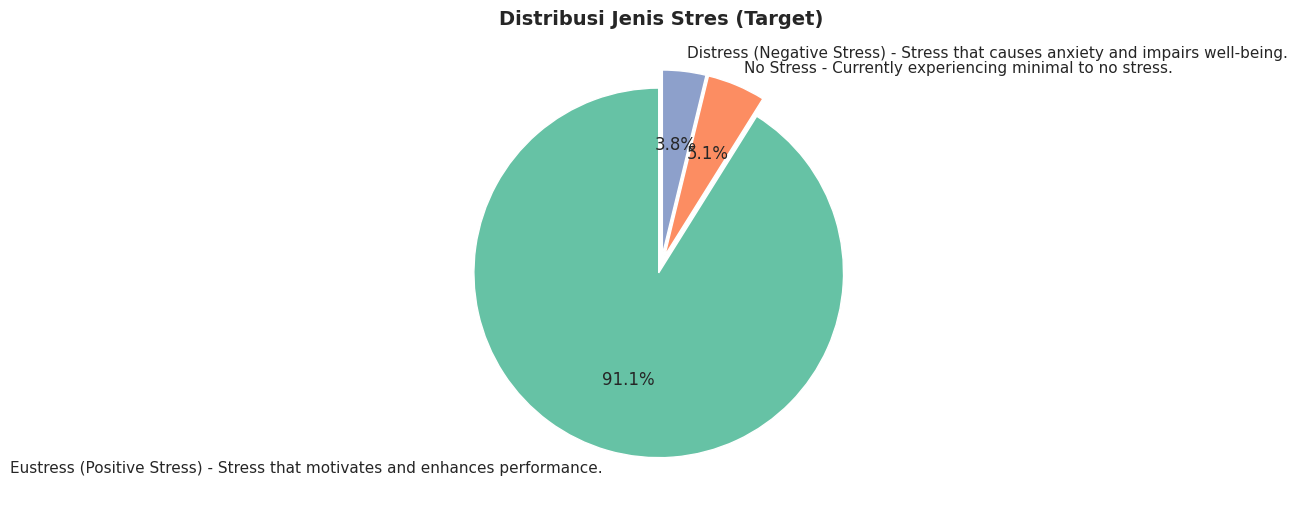

/tmp/ipython-input-2730661621.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target_col, data=df, palette="Set2")


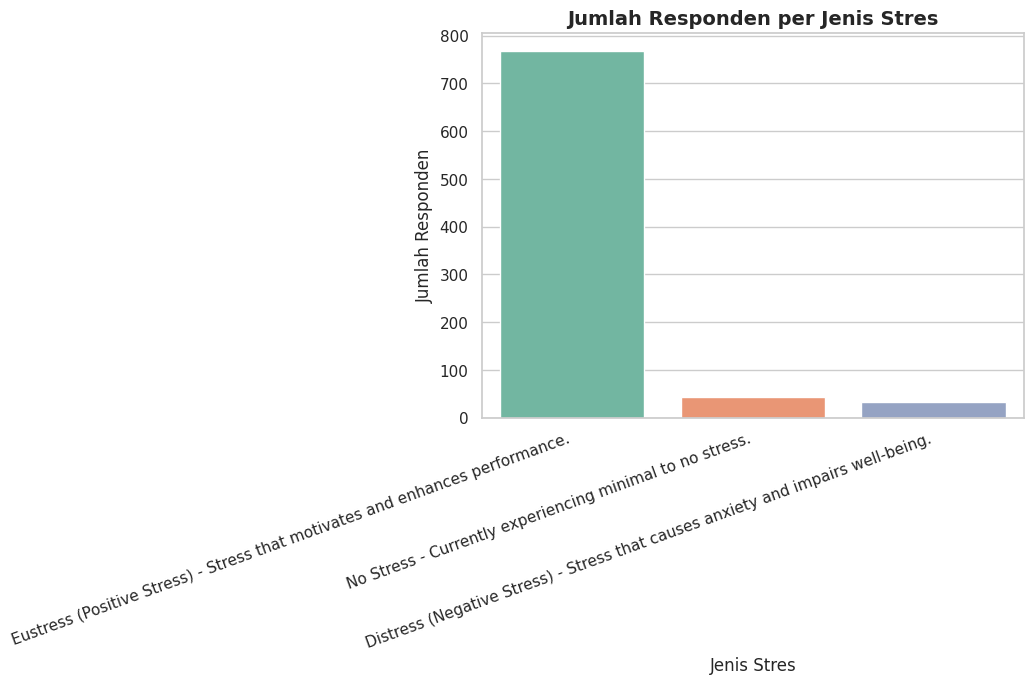

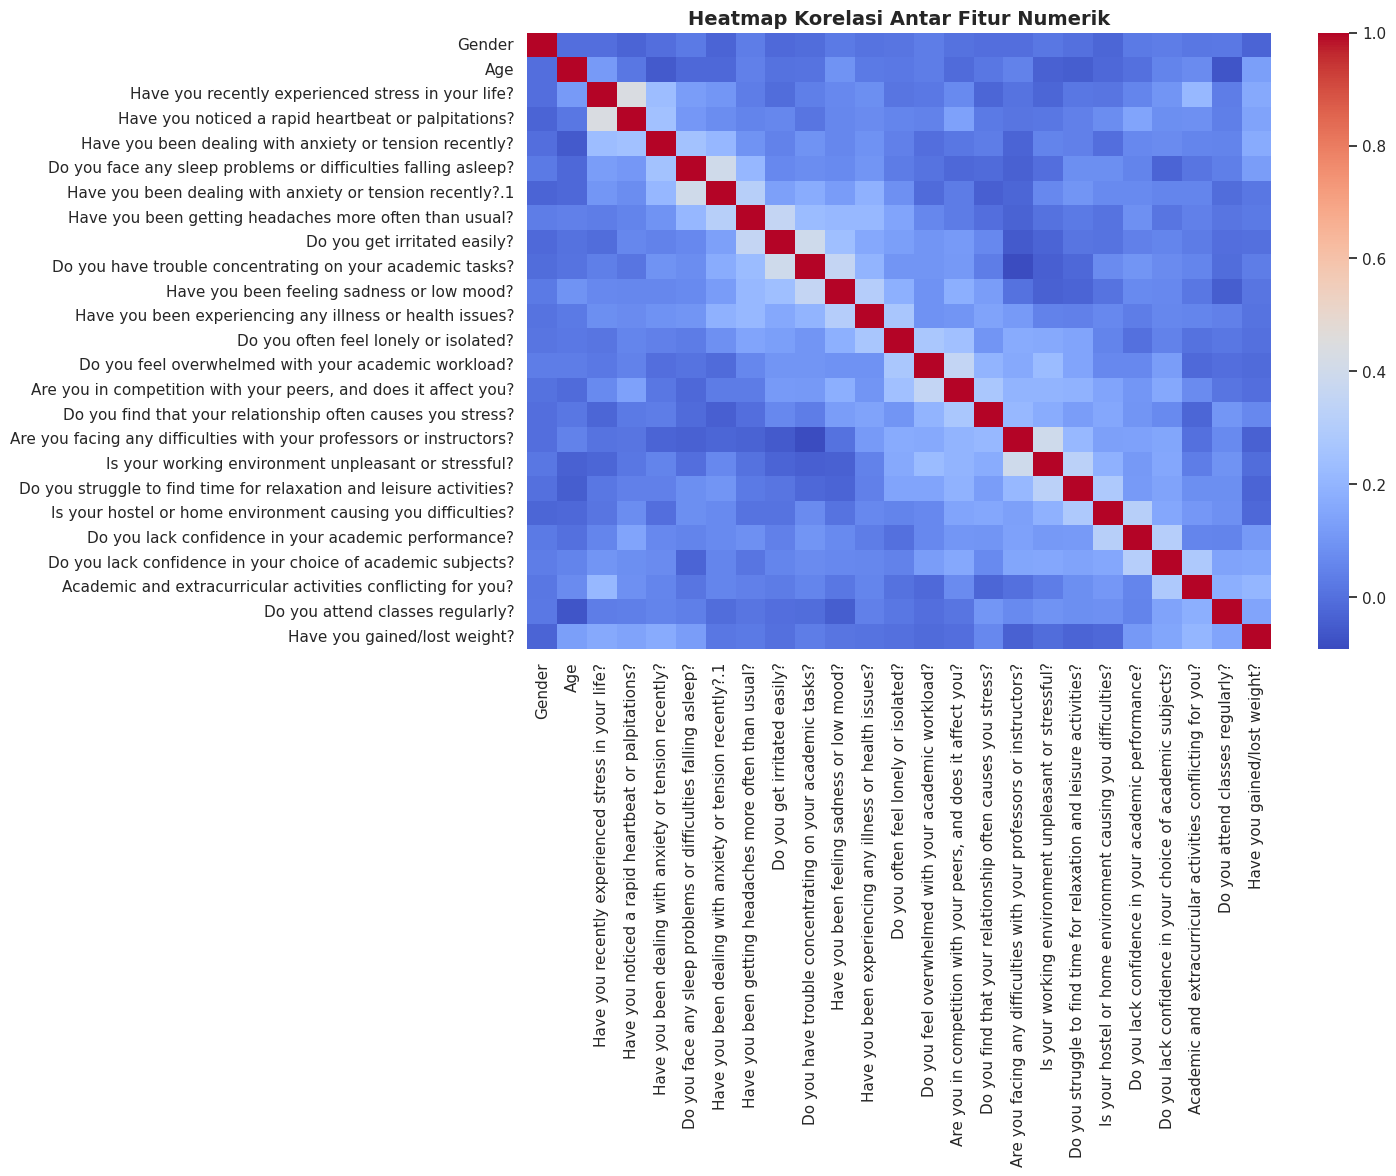

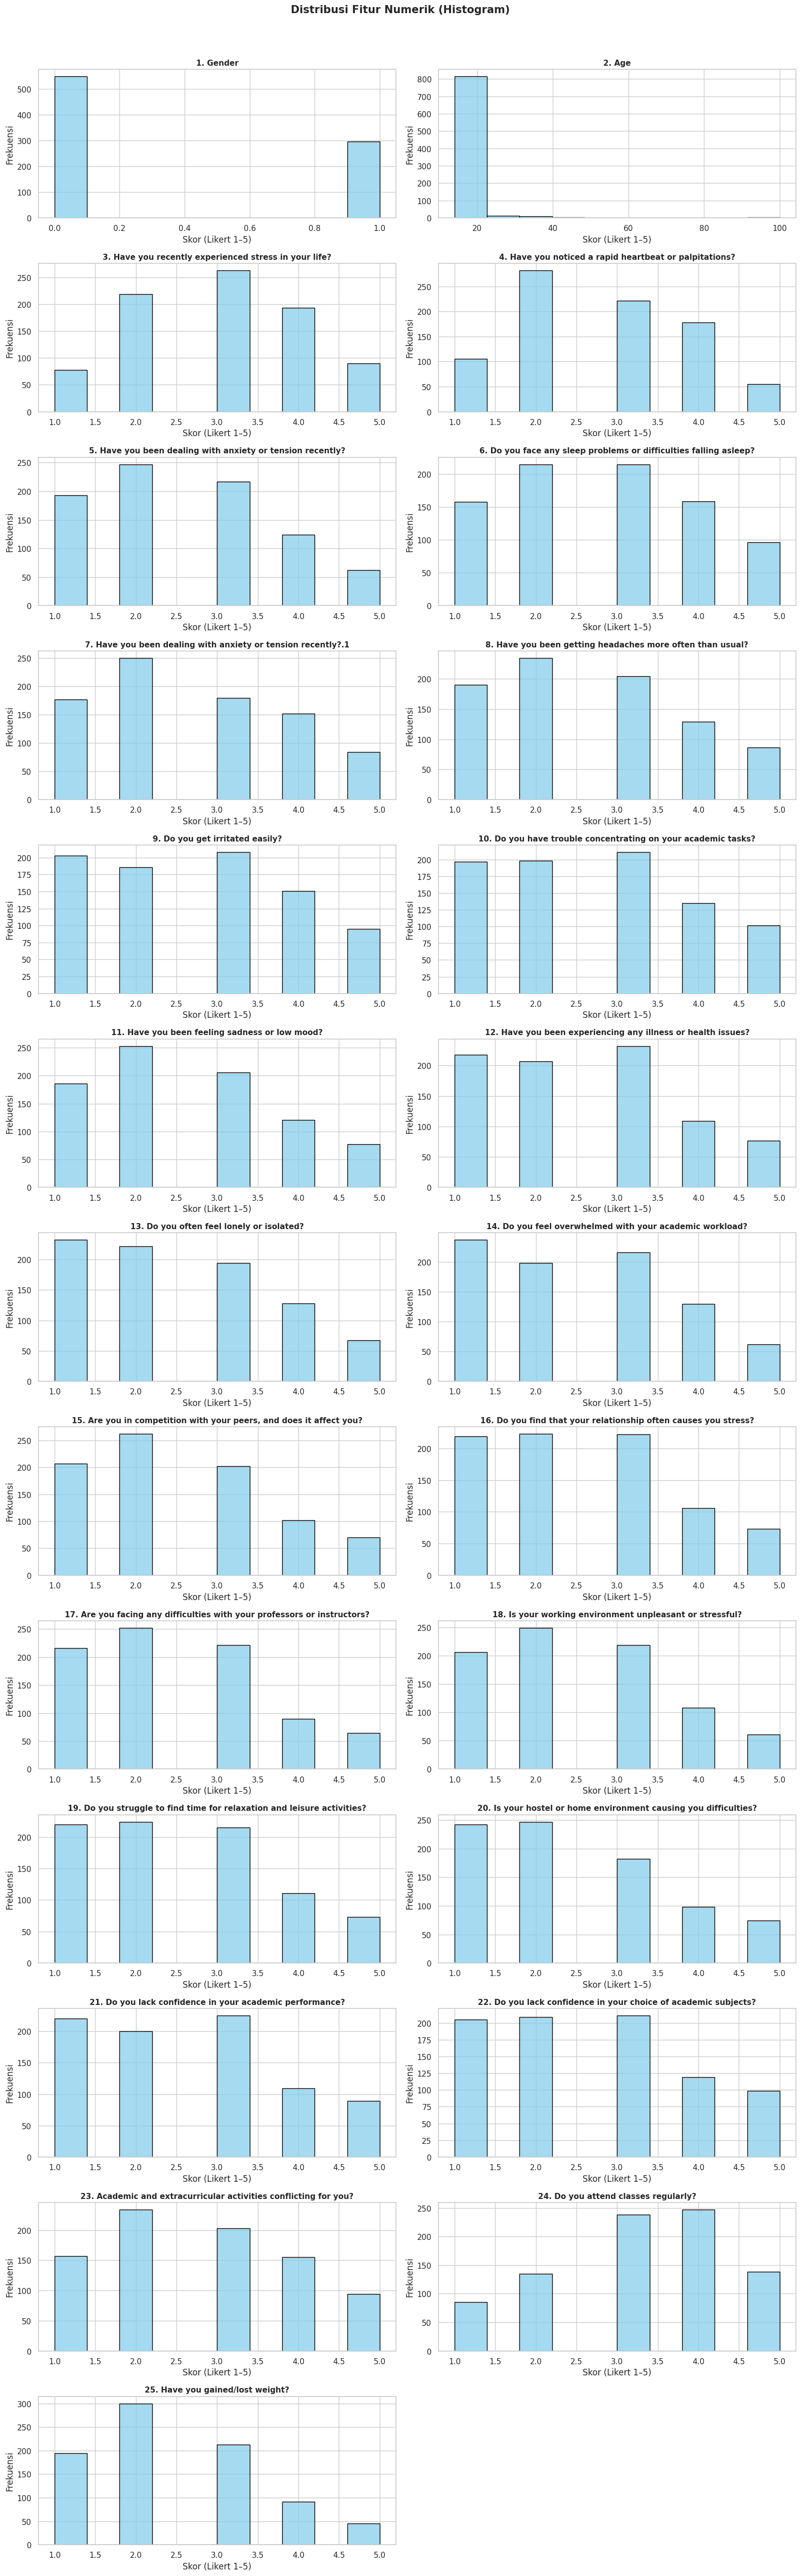

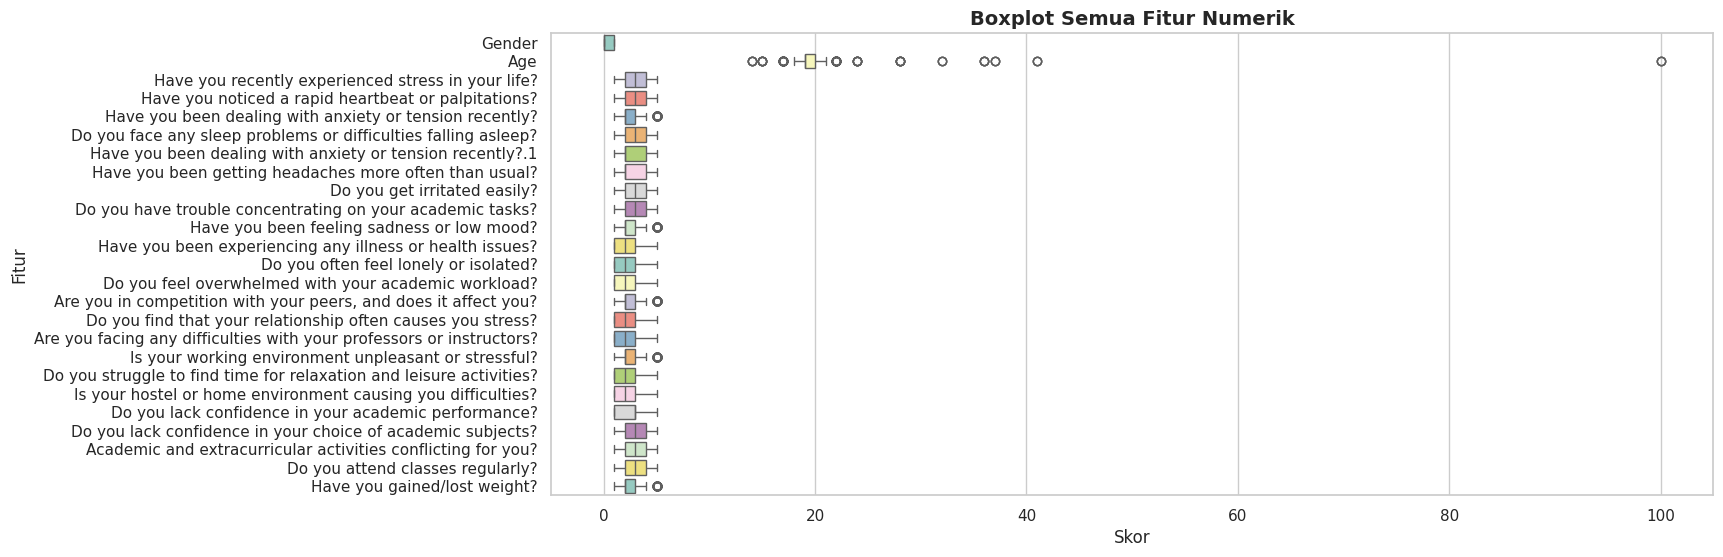

/tmp/ipython-input-2730661621.py:113: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


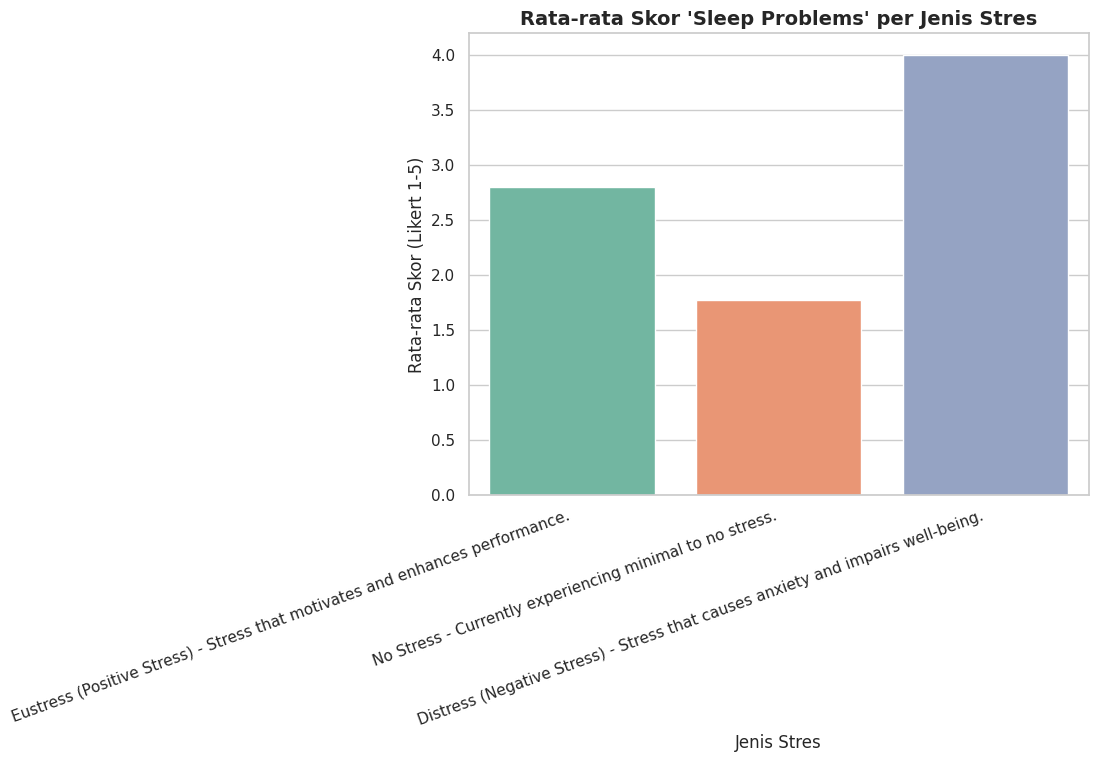

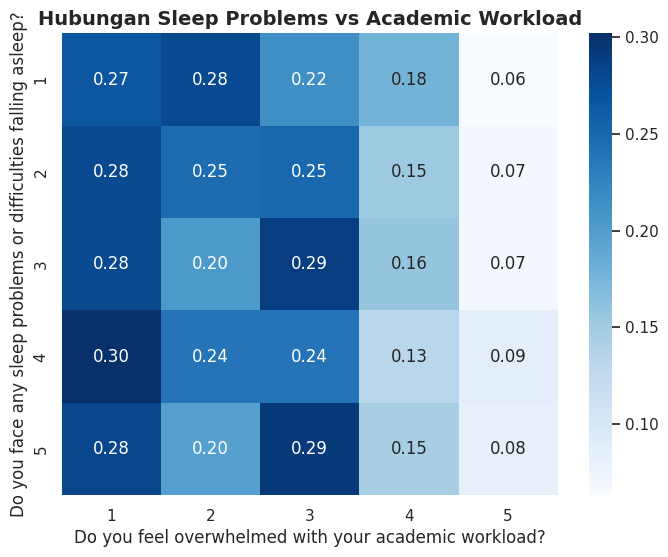


=== Explained Variance PCA ===
PC1: 12.26%
PC2: 8.87%
Total: 21.13%


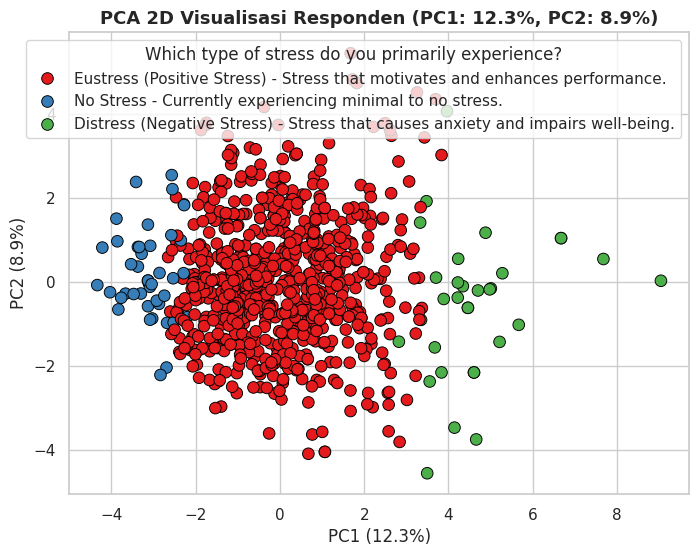

/tmp/ipython-input-2730661621.py:179: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.head(10), y=importances.head(10).index, palette="viridis")


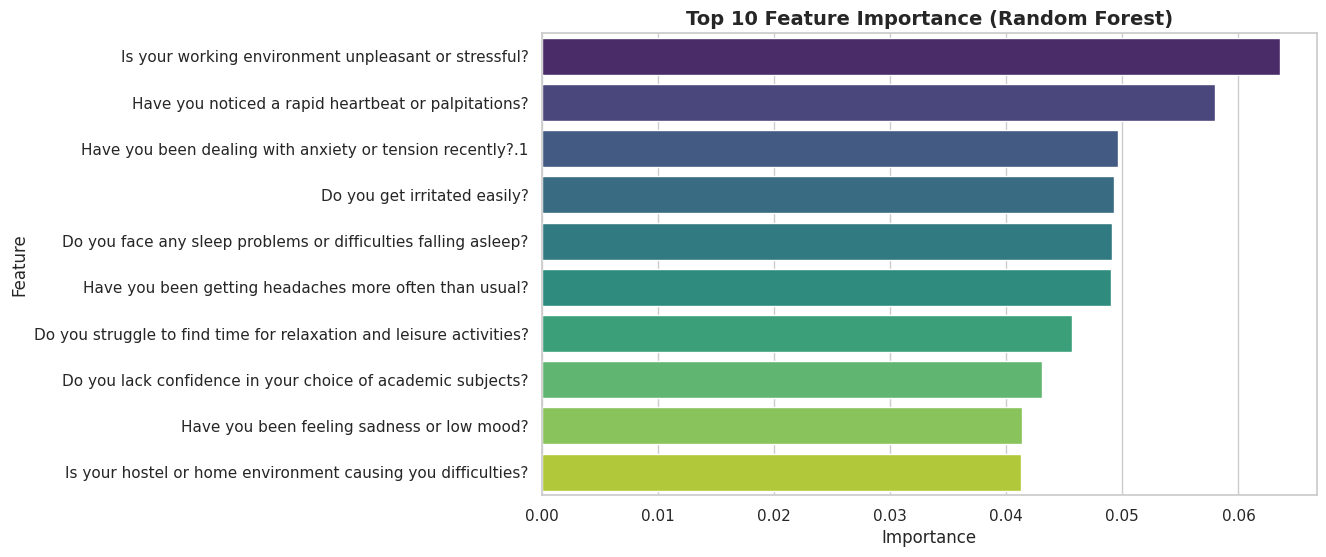


=== Top 10 Feature Importance ===
Is your working environment unpleasant or stressful?                   0.063562
Have you noticed a rapid heartbeat or palpitations?                    0.057962
Have you been dealing with anxiety or tension recently?.1              0.049624
Do you get irritated easily?                                           0.049322
Do you face any sleep problems or difficulties falling asleep?         0.049125
Have you been getting headaches more often than usual?                 0.049058
Do you struggle to find time for relaxation and leisure activities?    0.045669
Do you lack confidence in your choice of academic subjects?            0.043121
Have you been feeling sadness or low mood?                             0.041351
Is your hostel or home environment causing you difficulties?           0.041231
dtype: float64


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Atur style visualisasi
sns.set(style="whitegrid")

# 1. Load dataset
df = pd.read_csv("drive/MyDrive/Proyek_mandiri/Stress_Dataset.csv")

# ==========================================
# Exploratory Data Analysis (EDA) Final Pipeline
# ==========================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# ==============================
# 0. Handling Missing Values
# ==============================
print("=== Missing Values Sebelum Cleaning ===")
print(df.isnull().sum())

# Isi NaN: numerik → median, kategori → modus
for col in df.columns:
    if df[col].dtype in ["int64", "float64"]:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

print("\n=== Missing Values Setelah Cleaning ===")
print(df.isnull().sum().sum(), "nilai hilang tersisa")

# ==============================
# 1. Info Dataset
# ==============================
print("\n=== Info Dataset ===")
print(df.info())
print("\n=== Statistik Deskriptif ===")
print(df.describe(include="all").transpose())

# ==============================
# 2. Distribusi Target
# ==============================
target_col = "Which type of stress do you primarily experience?"

plt.figure(figsize=(6,6))
df[target_col].value_counts().plot.pie(
    autopct="%1.1f%%", startangle=90,
    explode=[0.05]*df[target_col].nunique(),
    colors=sns.color_palette("Set2", n_colors=df[target_col].nunique())
)
plt.title("Distribusi Jenis Stres (Target)", fontsize=14, fontweight="bold")
plt.ylabel("")
plt.show()

plt.figure(figsize=(7,5))
sns.countplot(x=target_col, data=df, palette="Set2")
plt.title("Jumlah Responden per Jenis Stres", fontsize=14, fontweight="bold")
plt.xlabel("Jenis Stres")
plt.ylabel("Jumlah Responden")
plt.xticks(rotation=20, ha="right")
plt.show()

# ==============================
# 3. Korelasi Fitur Numerik
# ==============================
numeric_df = df.select_dtypes(include=["int64", "float64"])

plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=False, cmap="coolwarm", cbar=True)
plt.title("Heatmap Korelasi Antar Fitur Numerik", fontsize=14, fontweight="bold")
plt.show()

# ==============================
# 4. Distribusi Fitur Numerik
# ==============================
# Histogram
n_cols = 2
n_rows = (len(numeric_df.columns) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows*4))
axes = axes.flatten()

for i, col in enumerate(numeric_df.columns):
    sns.histplot(df[col], bins=10, kde=False, color="skyblue", ax=axes[i], edgecolor="black")
    axes[i].set_title(f"{i+1}. {col}", fontsize=11, fontweight="bold")
    axes[i].set_xlabel("Skor (Likert 1–5)")
    axes[i].set_ylabel("Frekuensi")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Distribusi Fitur Numerik (Histogram)", fontsize=15, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# Boxplot
plt.figure(figsize=(15,6))
sns.boxplot(data=numeric_df, orient="h", palette="Set3")
plt.title("Boxplot Semua Fitur Numerik", fontsize=14, fontweight="bold")
plt.xlabel("Skor")
plt.ylabel("Fitur")
plt.show()

# ==============================
# 5. Analisis Bivariat
# ==============================
plt.figure(figsize=(8,6))
sns.barplot(
    x=target_col,
    y="Do you face any sleep problems or difficulties falling asleep?",
    data=df,
    estimator="mean",
    errorbar=None,
    palette="Set2"
)
plt.title("Rata-rata Skor 'Sleep Problems' per Jenis Stres", fontsize=14, fontweight="bold")
plt.xlabel("Jenis Stres")
plt.ylabel("Rata-rata Skor (Likert 1-5)")
plt.xticks(rotation=20, ha="right")
plt.show()

# ==============================
# 6. Crosstab/Heatmap antar faktor
# ==============================
crosstab = pd.crosstab(
    df["Do you face any sleep problems or difficulties falling asleep?"],
    df["Do you feel overwhelmed with your academic workload?"],
    normalize="index"
)

plt.figure(figsize=(8,6))
sns.heatmap(crosstab, annot=True, cmap="Blues", fmt=".2f")
plt.title("Hubungan Sleep Problems vs Academic Workload", fontsize=14, fontweight="bold")
plt.show()

# ==============================
# 7. PCA (2D) dengan Explained Variance
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_df)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

explained_var = pca.explained_variance_ratio_ * 100
print("\n=== Explained Variance PCA ===")
print(f"PC1: {explained_var[0]:.2f}%")
print(f"PC2: {explained_var[1]:.2f}%")
print(f"Total: {explained_var.sum():.2f}%")

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=pca_result[:,0], y=pca_result[:,1],
    hue=df[target_col], palette="Set1", s=70, edgecolor="black"
)
plt.title(f"PCA 2D Visualisasi Responden (PC1: {explained_var[0]:.1f}%, PC2: {explained_var[1]:.1f}%)",
          fontsize=13, fontweight="bold")
plt.xlabel(f"PC1 ({explained_var[0]:.1f}%)")
plt.ylabel(f"PC2 ({explained_var[1]:.1f}%)")
plt.show()

# ==============================
# 8. Feature Importance (Random Forest)
# ==============================
X = numeric_df
y = df[target_col]

rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=importances.head(10), y=importances.head(10).index, palette="viridis")
plt.title("Top 10 Feature Importance (Random Forest)", fontsize=14, fontweight="bold")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

print("\n=== Top 10 Feature Importance ===")
print(importances.head(10))

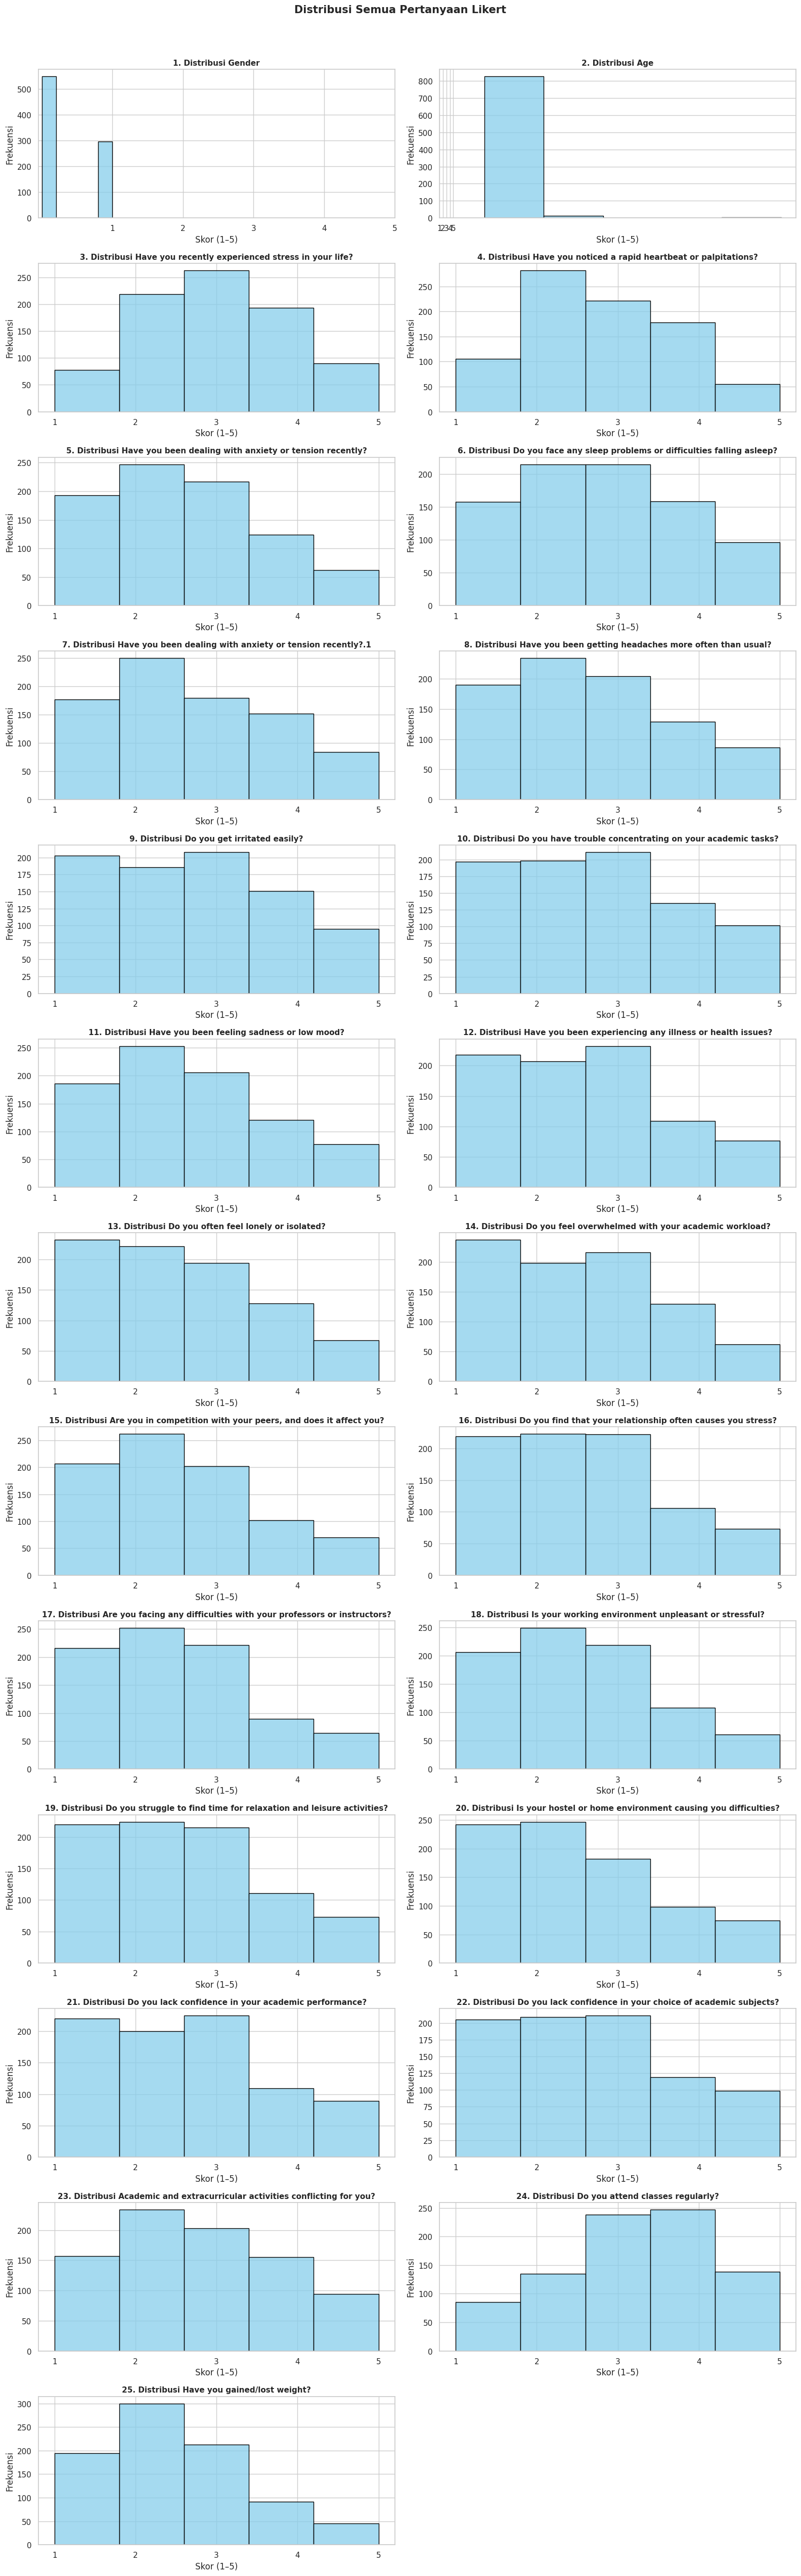

/tmp/ipython-input-848288932.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


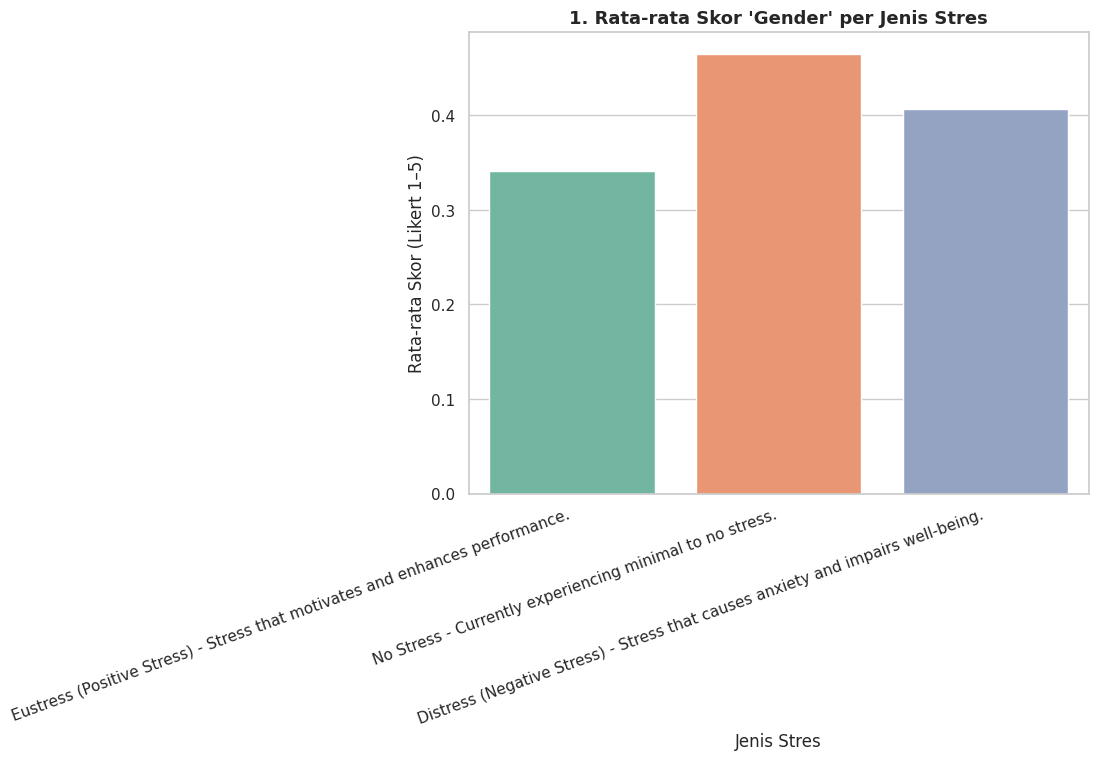

/tmp/ipython-input-848288932.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


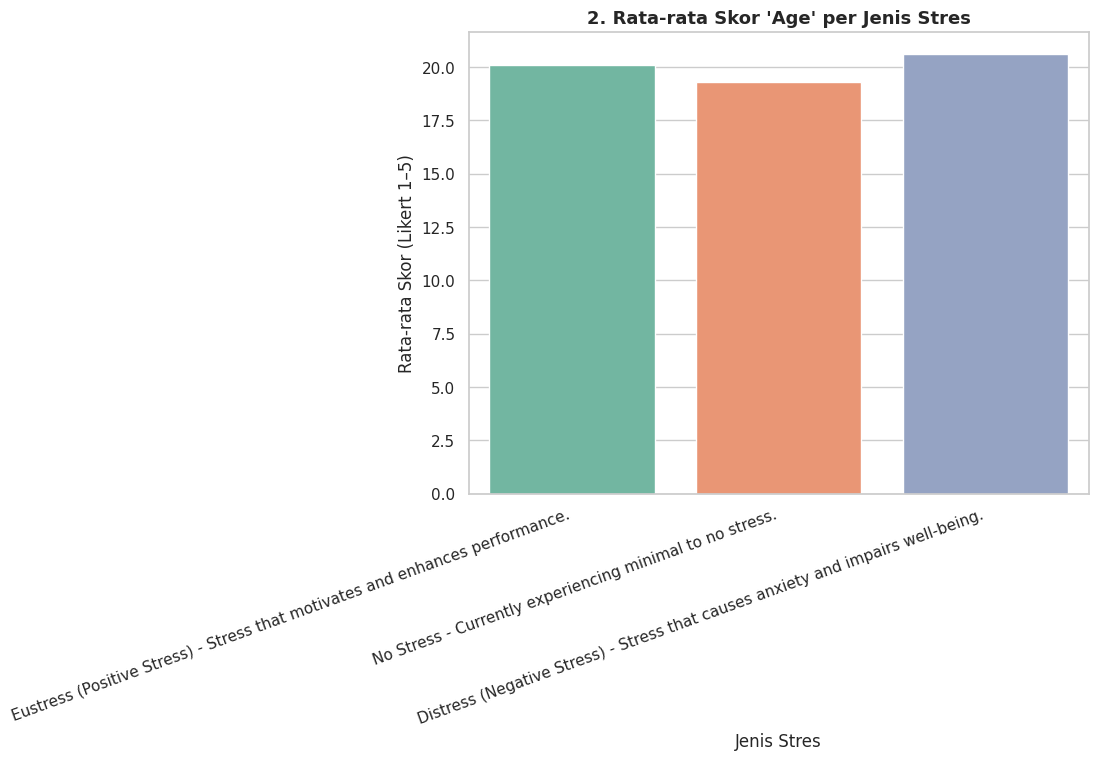

/tmp/ipython-input-848288932.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


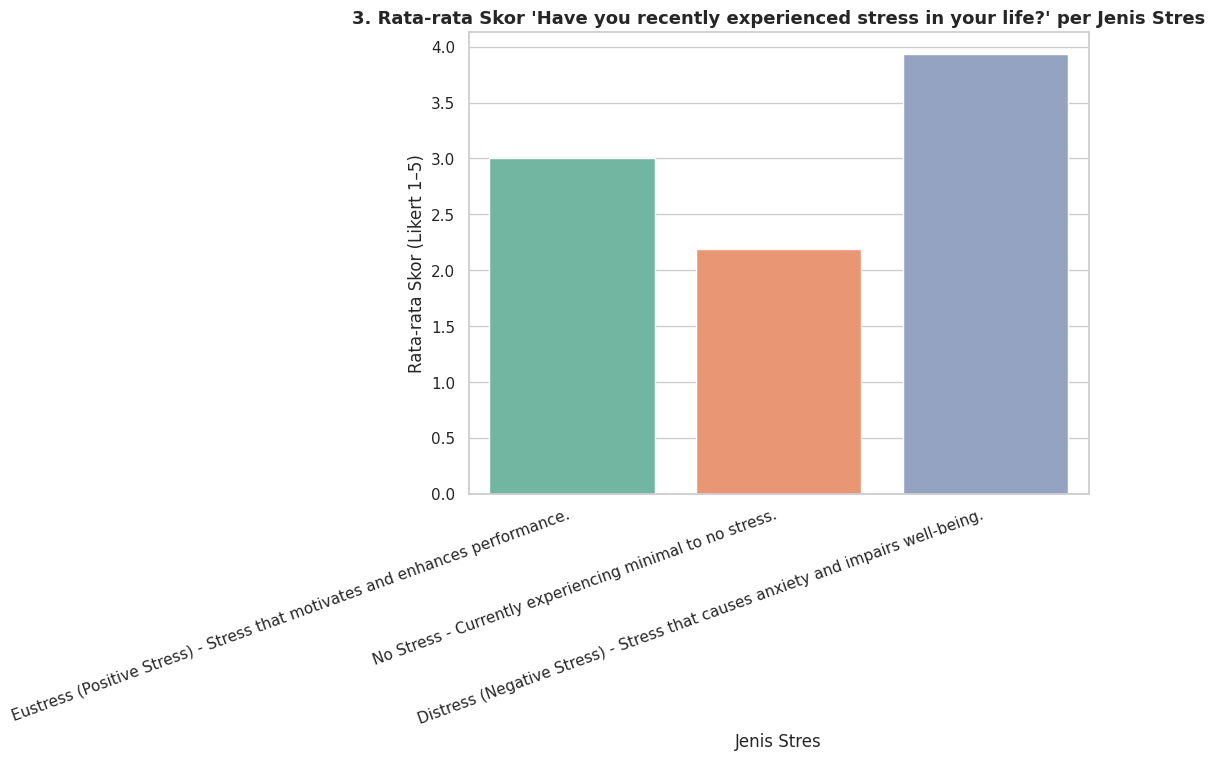

/tmp/ipython-input-848288932.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


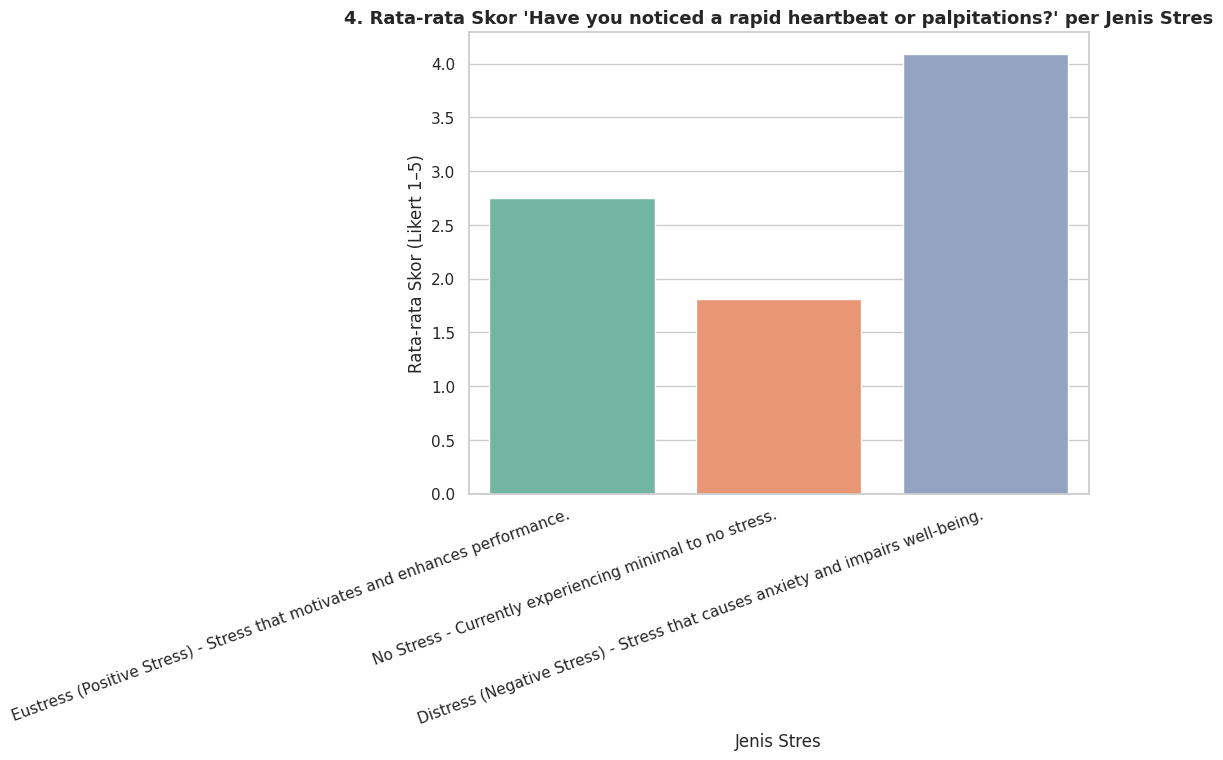

/tmp/ipython-input-848288932.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


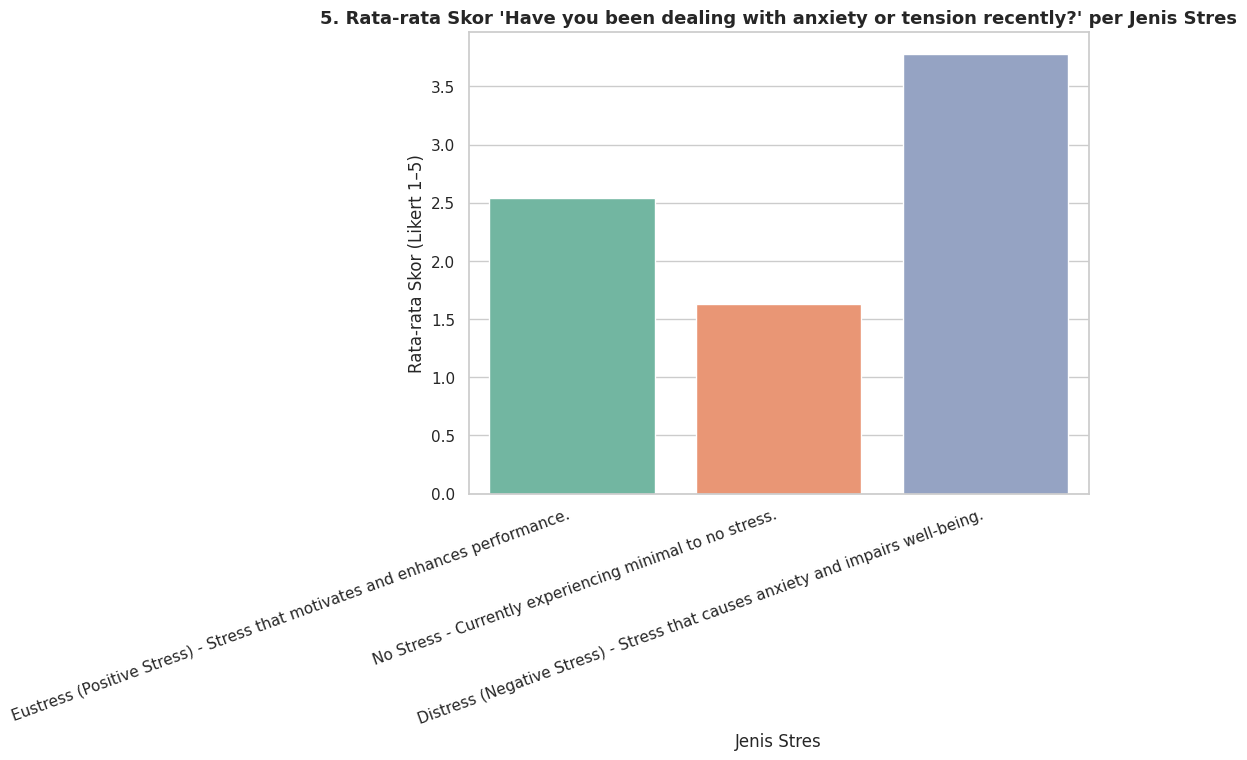

/tmp/ipython-input-848288932.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


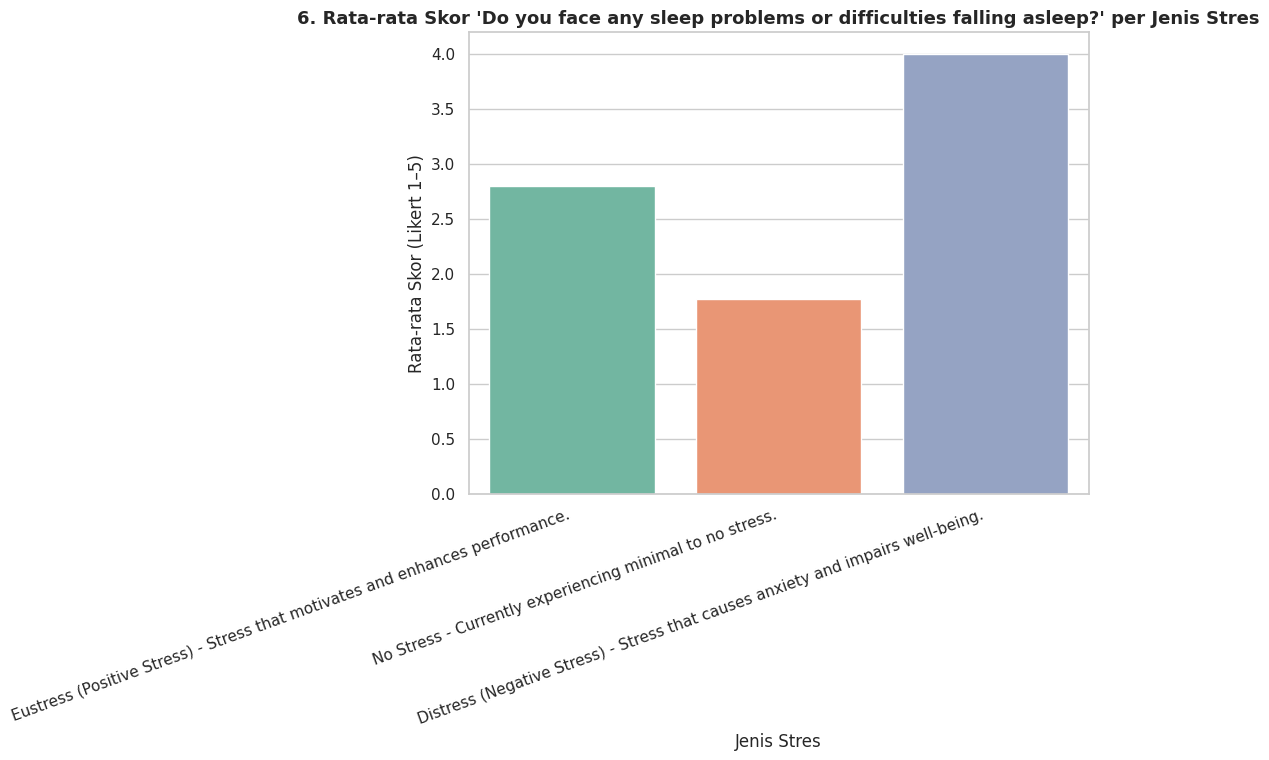

/tmp/ipython-input-848288932.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


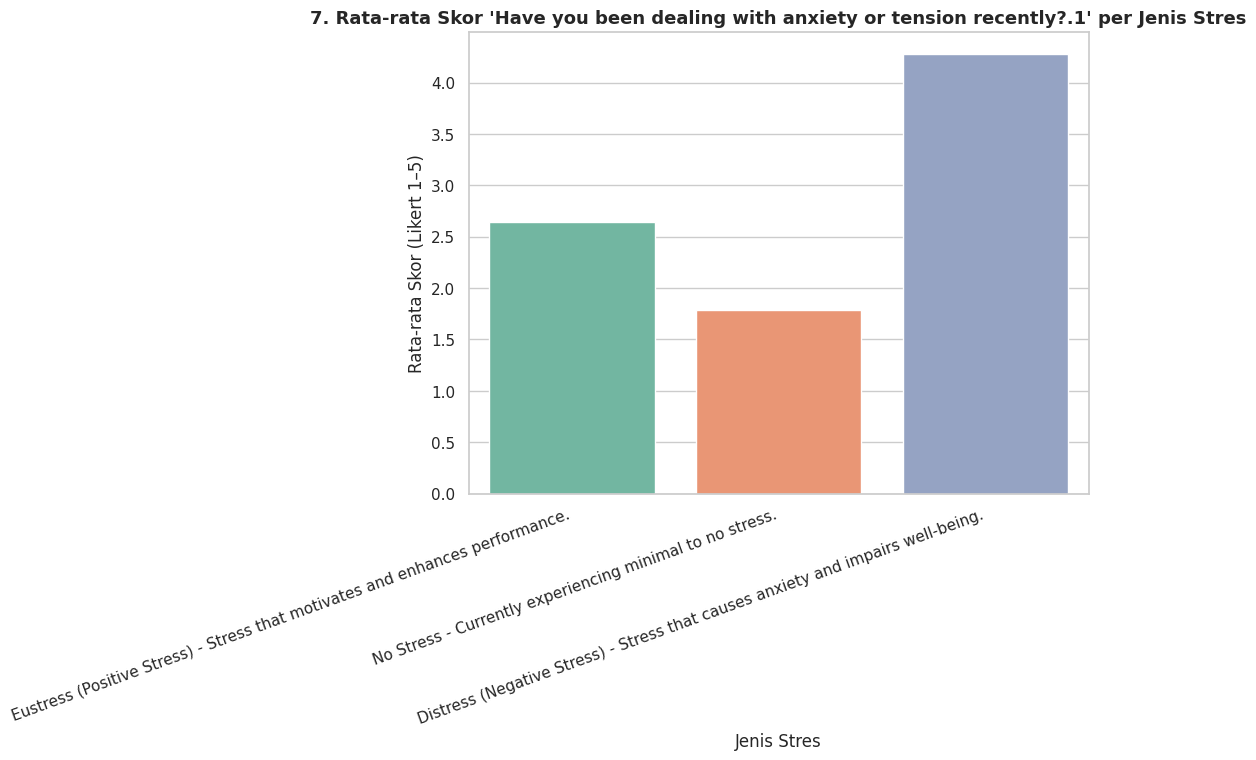

/tmp/ipython-input-848288932.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


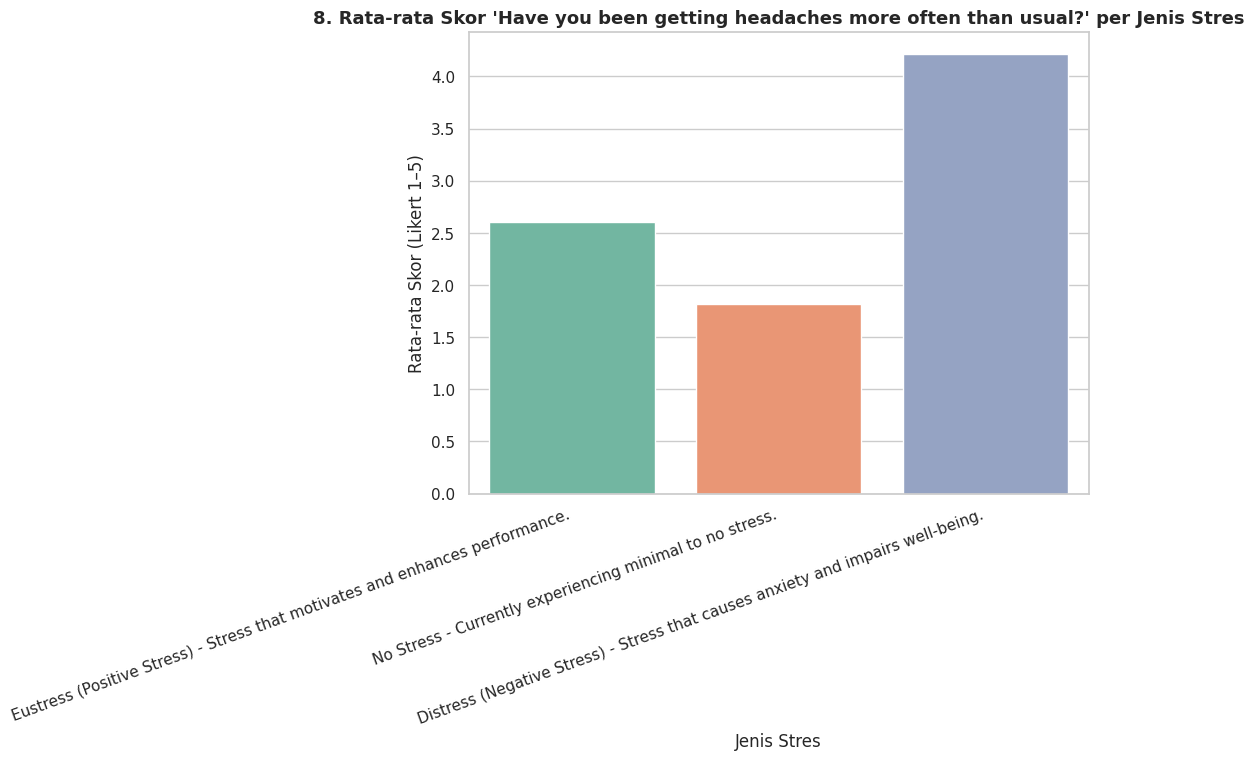

/tmp/ipython-input-848288932.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


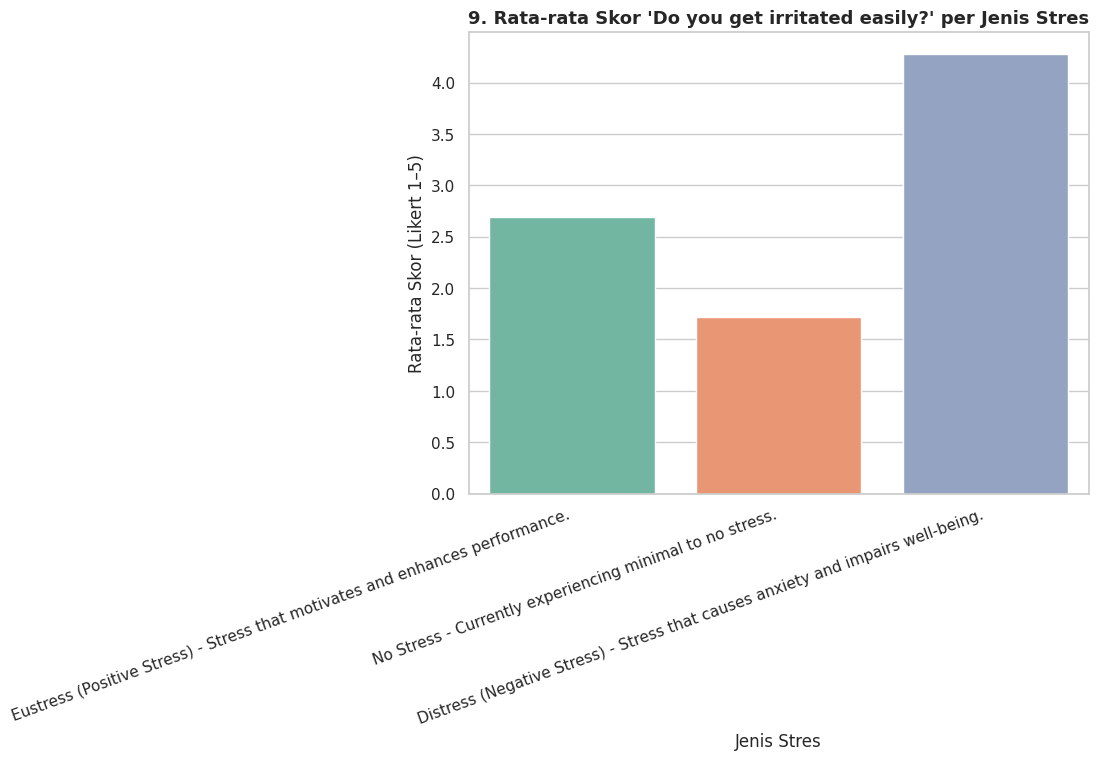

/tmp/ipython-input-848288932.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


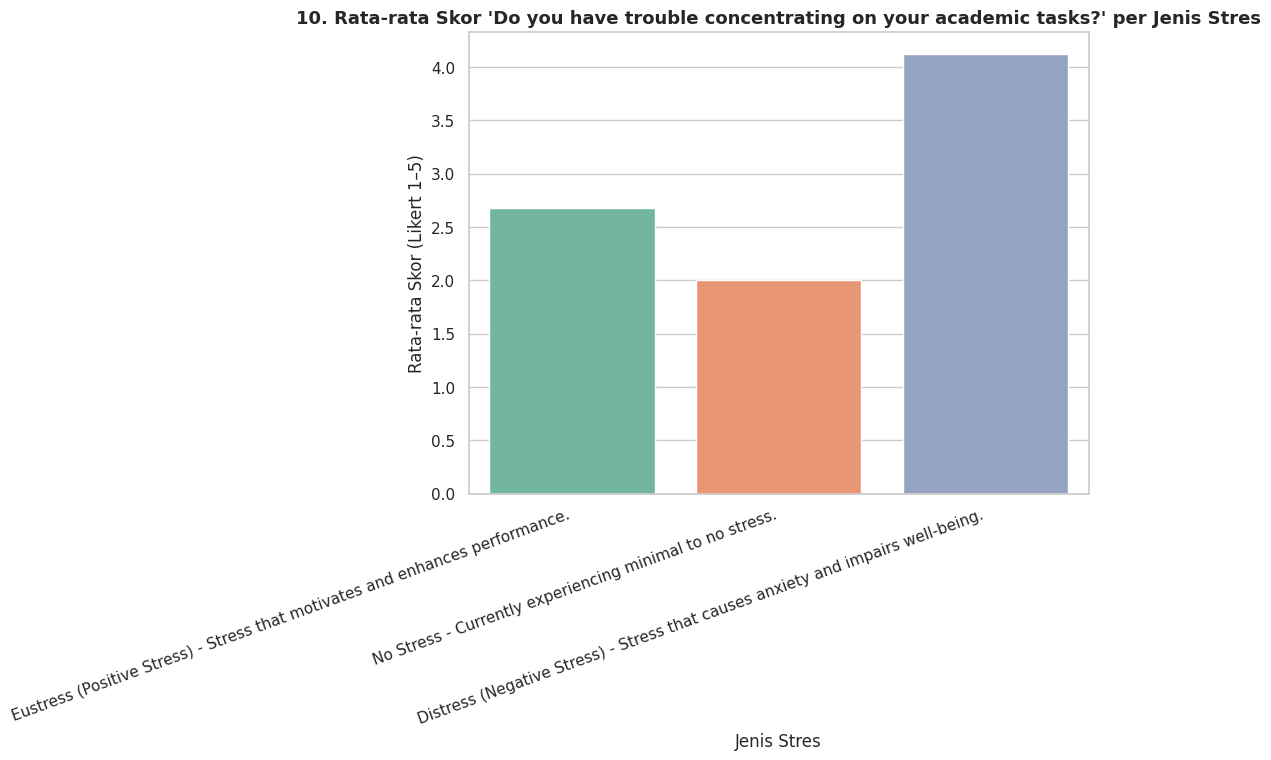

/tmp/ipython-input-848288932.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


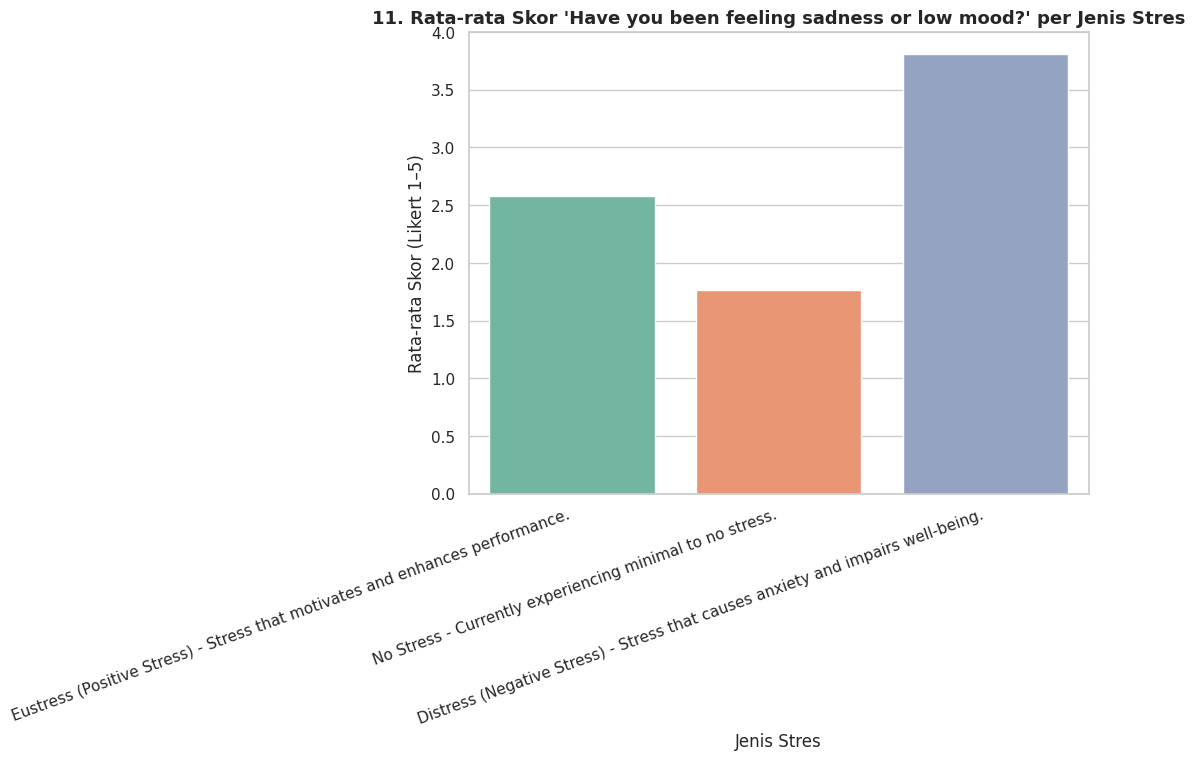

/tmp/ipython-input-848288932.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


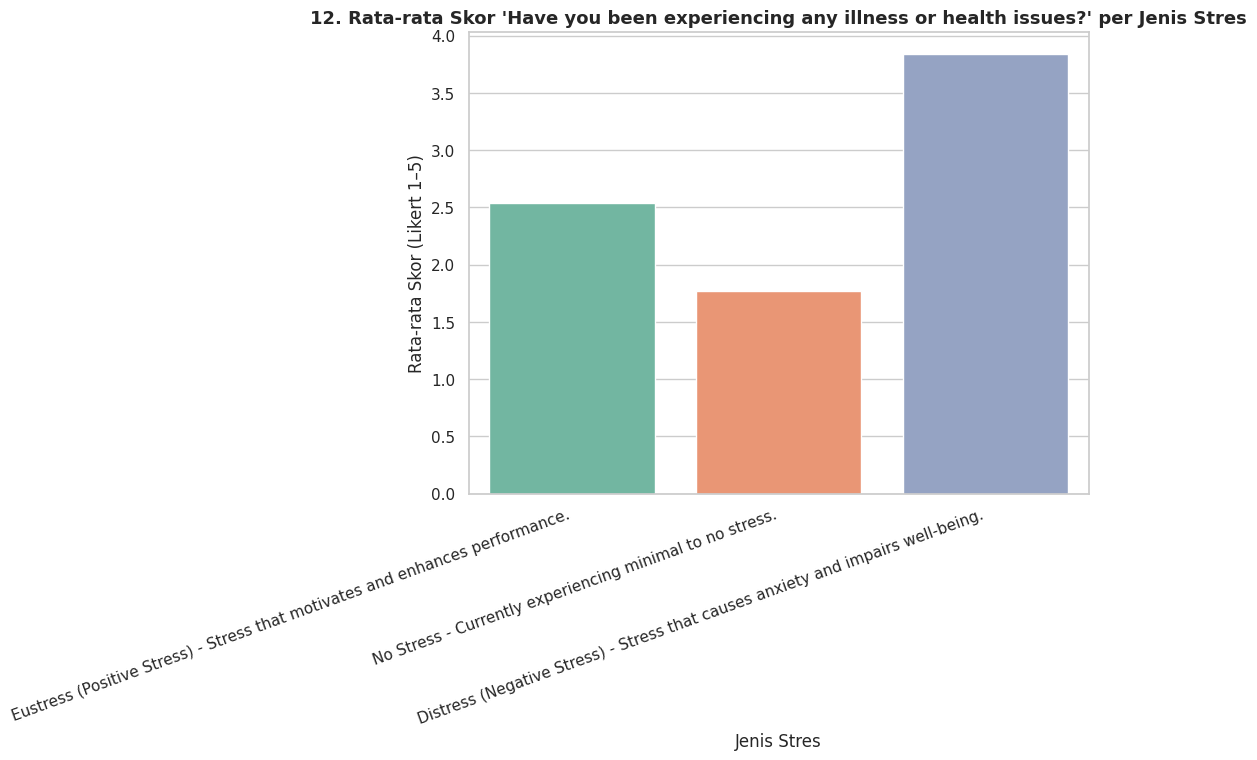

/tmp/ipython-input-848288932.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


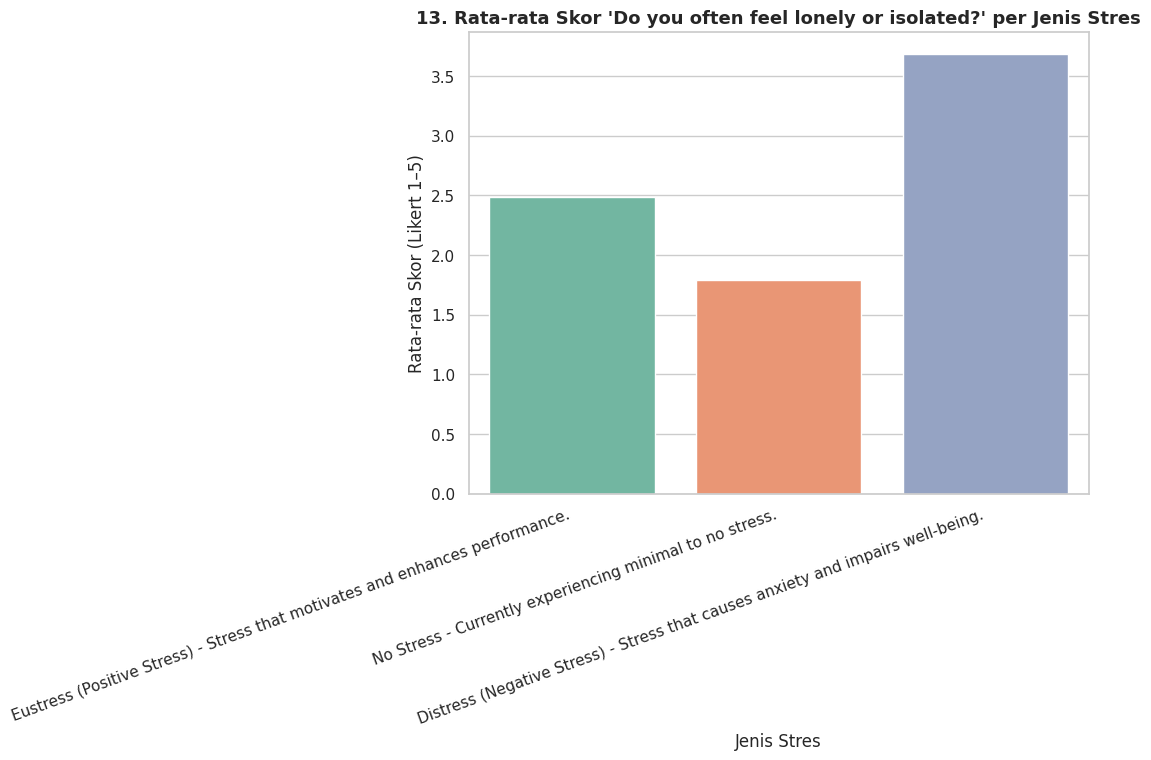

/tmp/ipython-input-848288932.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


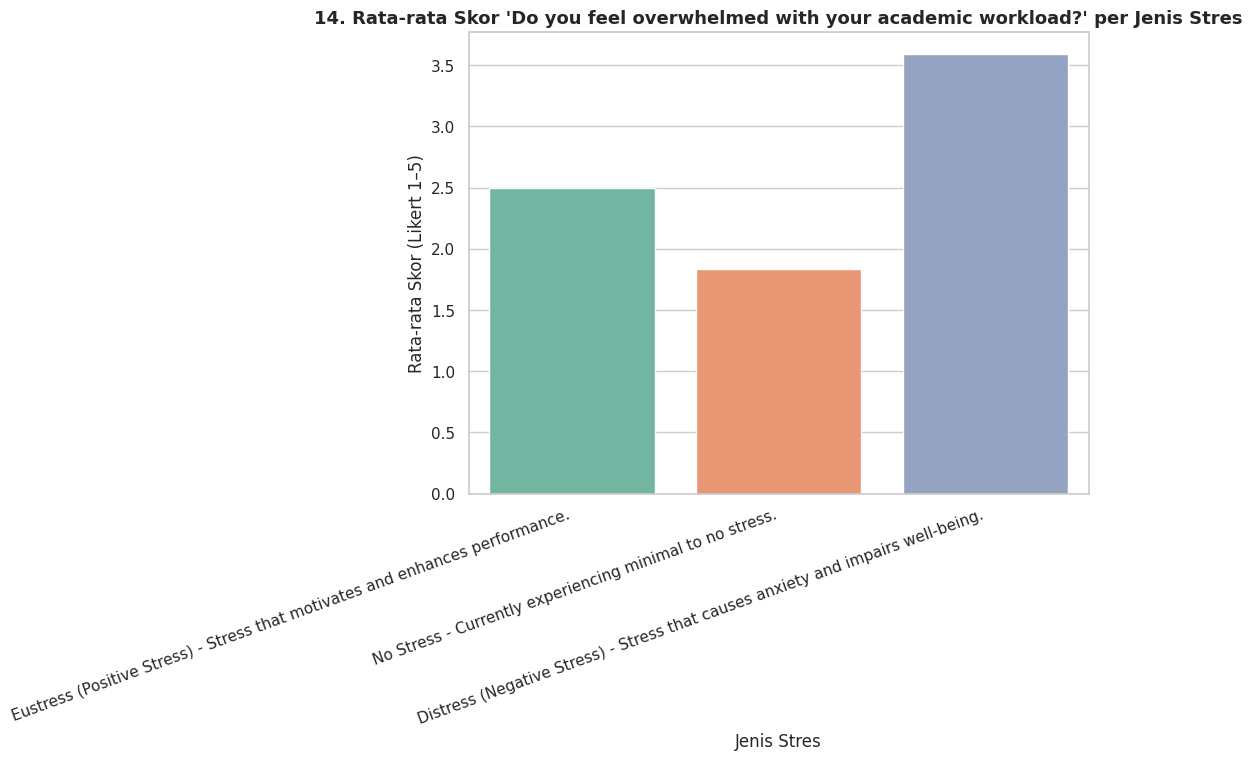

/tmp/ipython-input-848288932.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


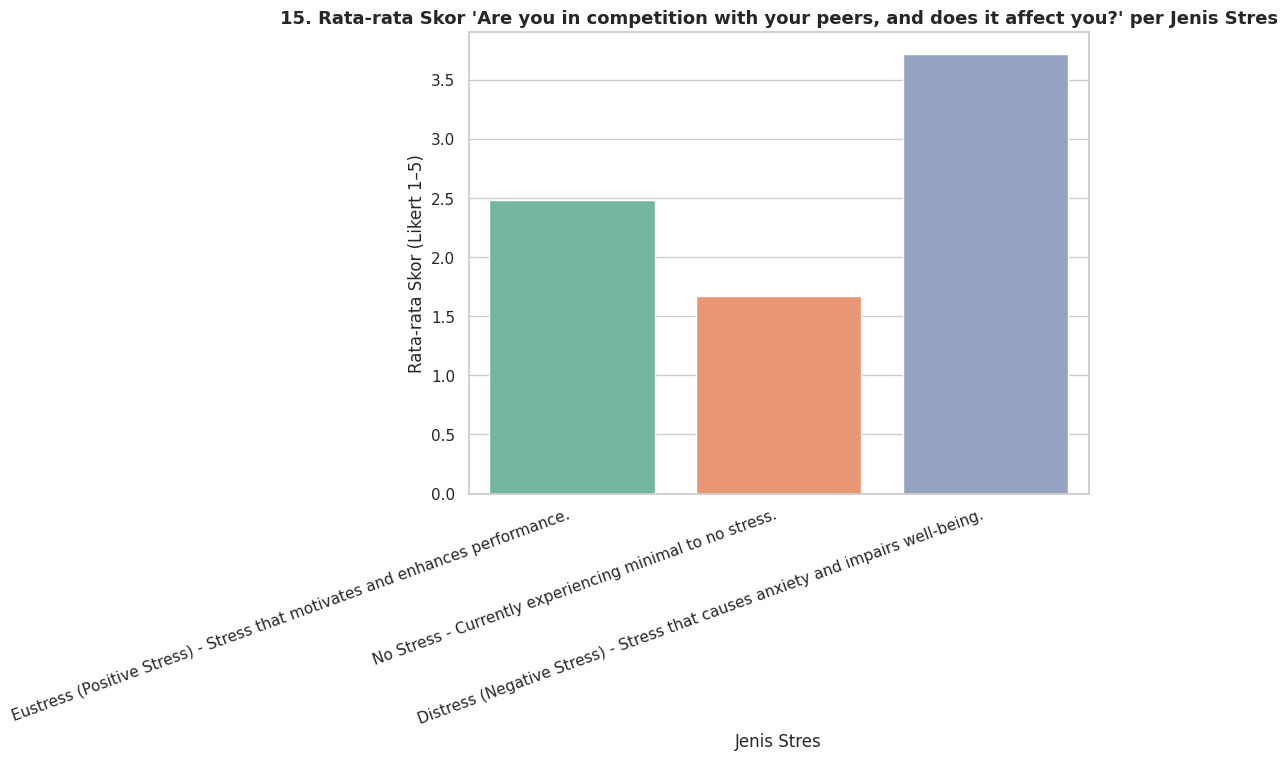

/tmp/ipython-input-848288932.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


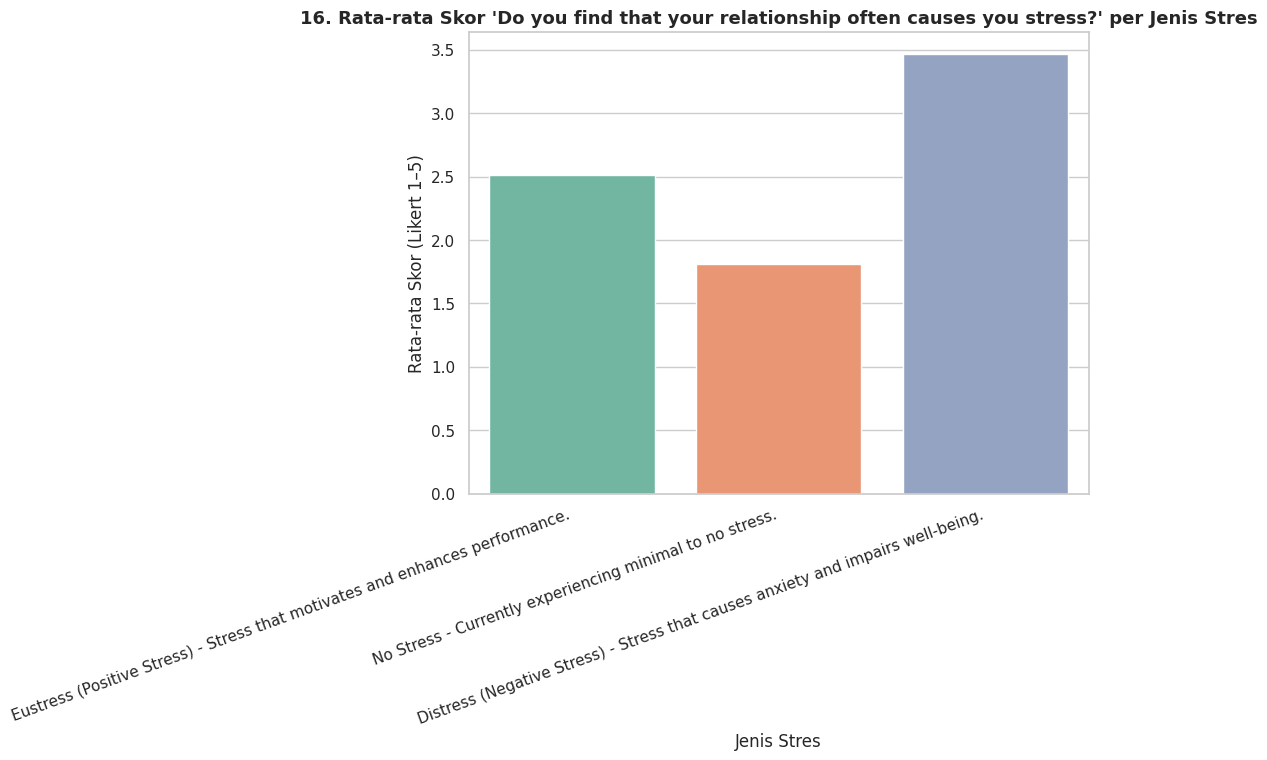

/tmp/ipython-input-848288932.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


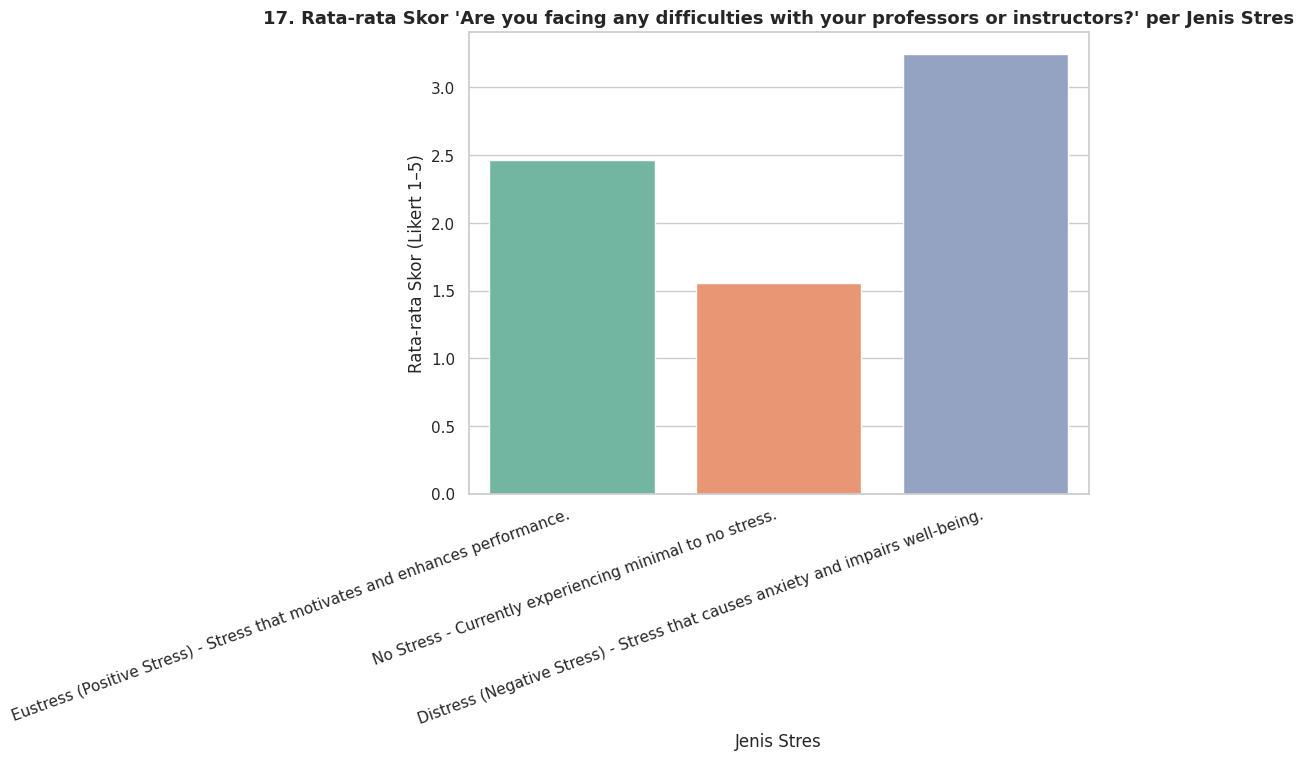

/tmp/ipython-input-848288932.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


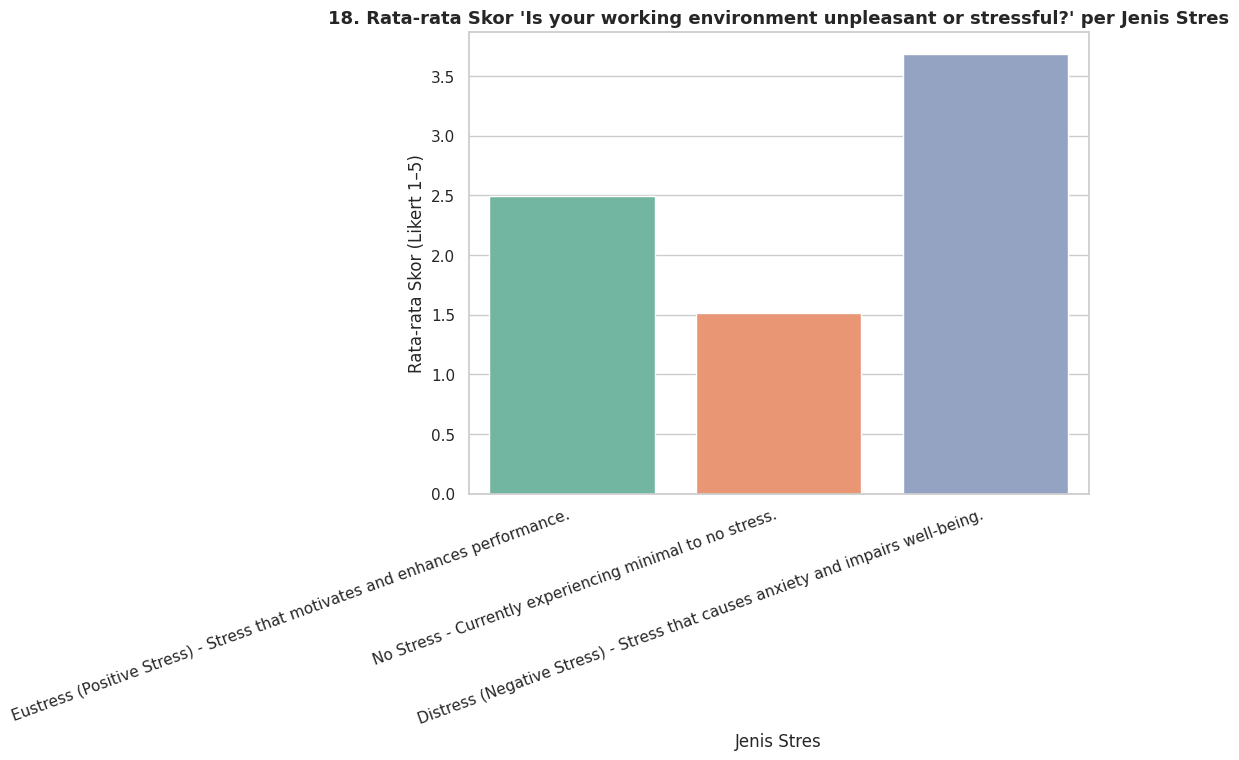

/tmp/ipython-input-848288932.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


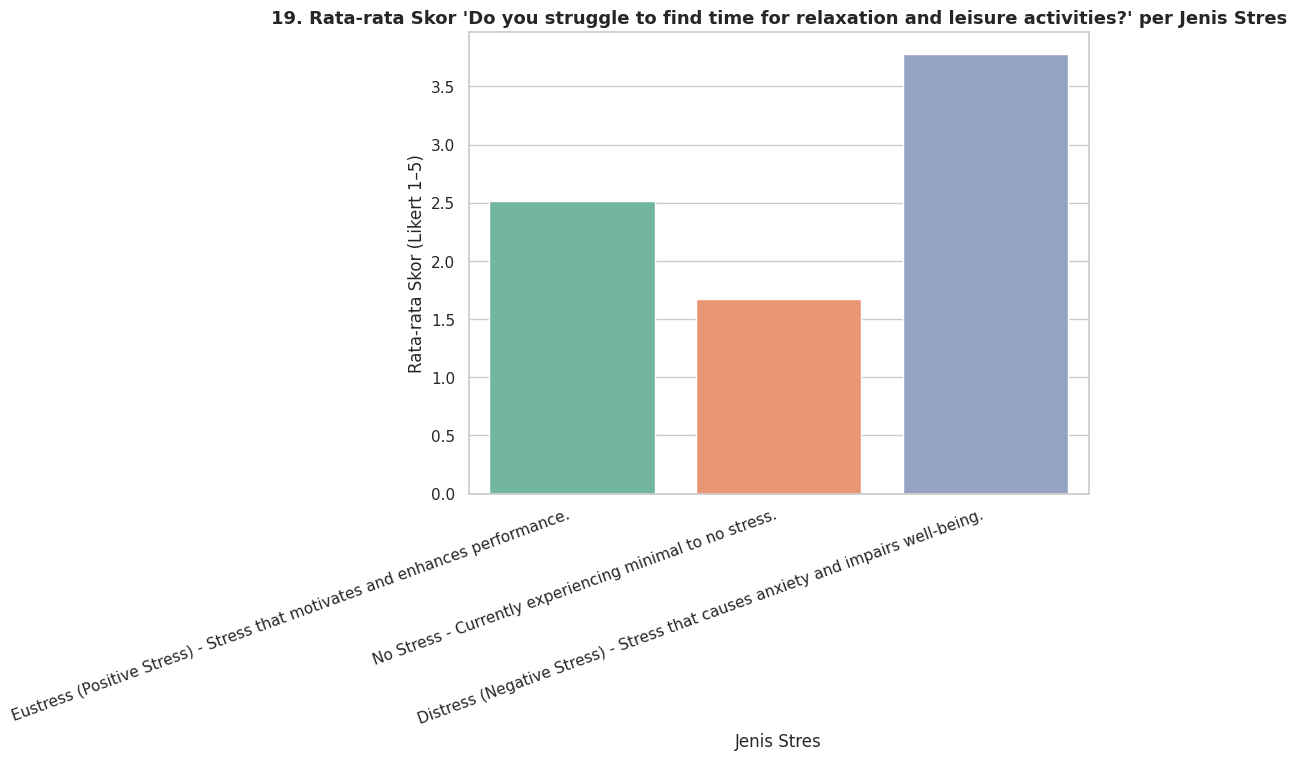

/tmp/ipython-input-848288932.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


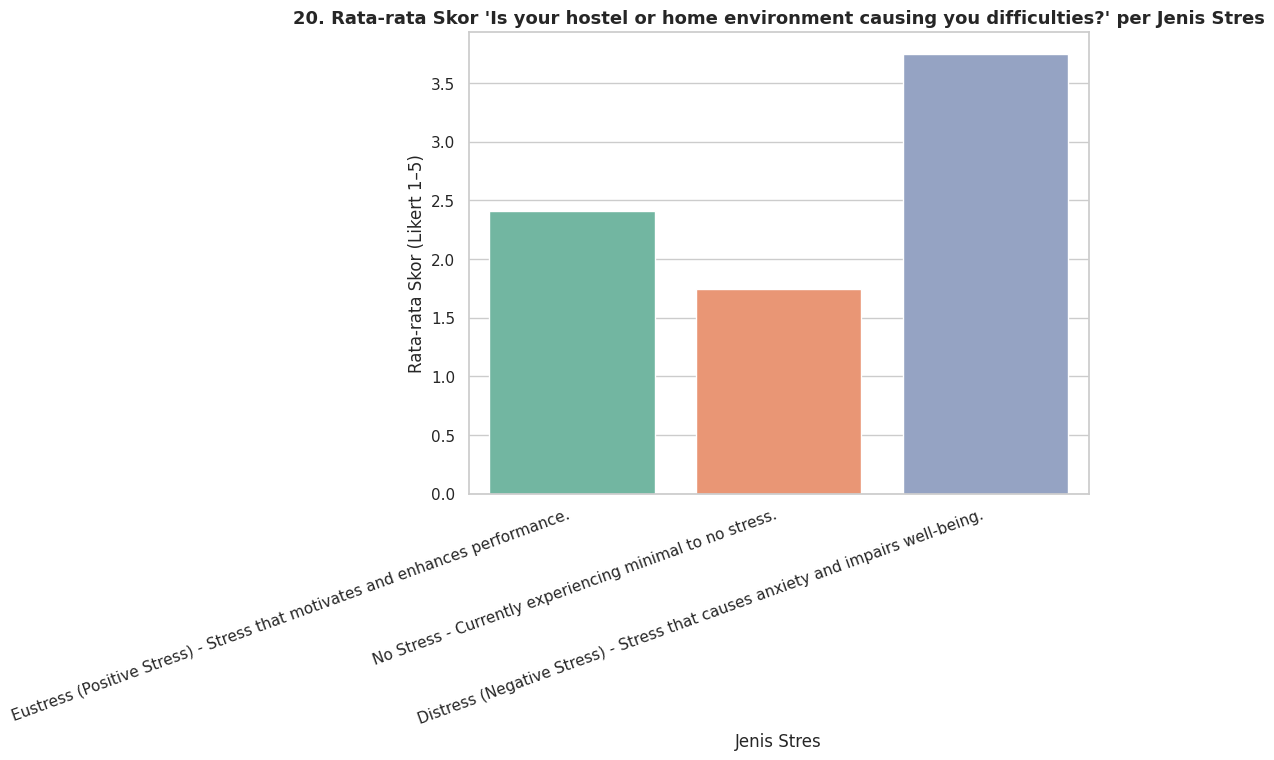

/tmp/ipython-input-848288932.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


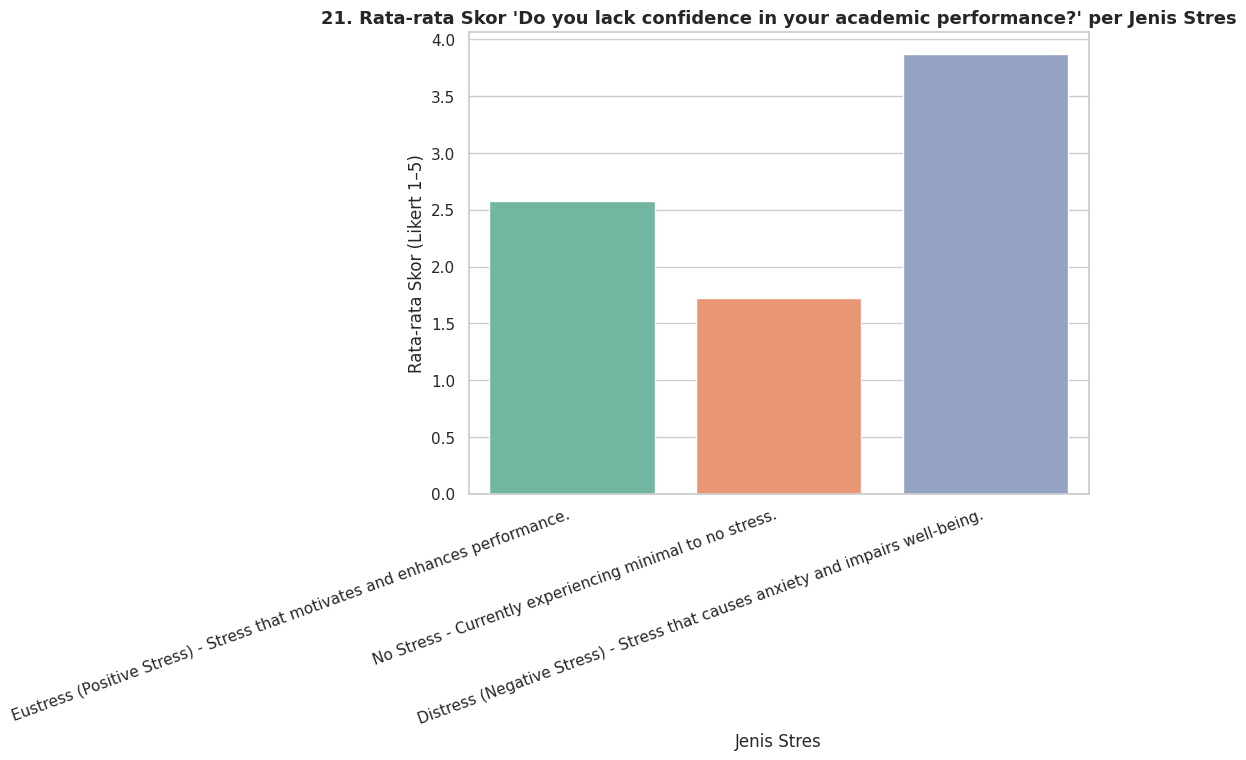

/tmp/ipython-input-848288932.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


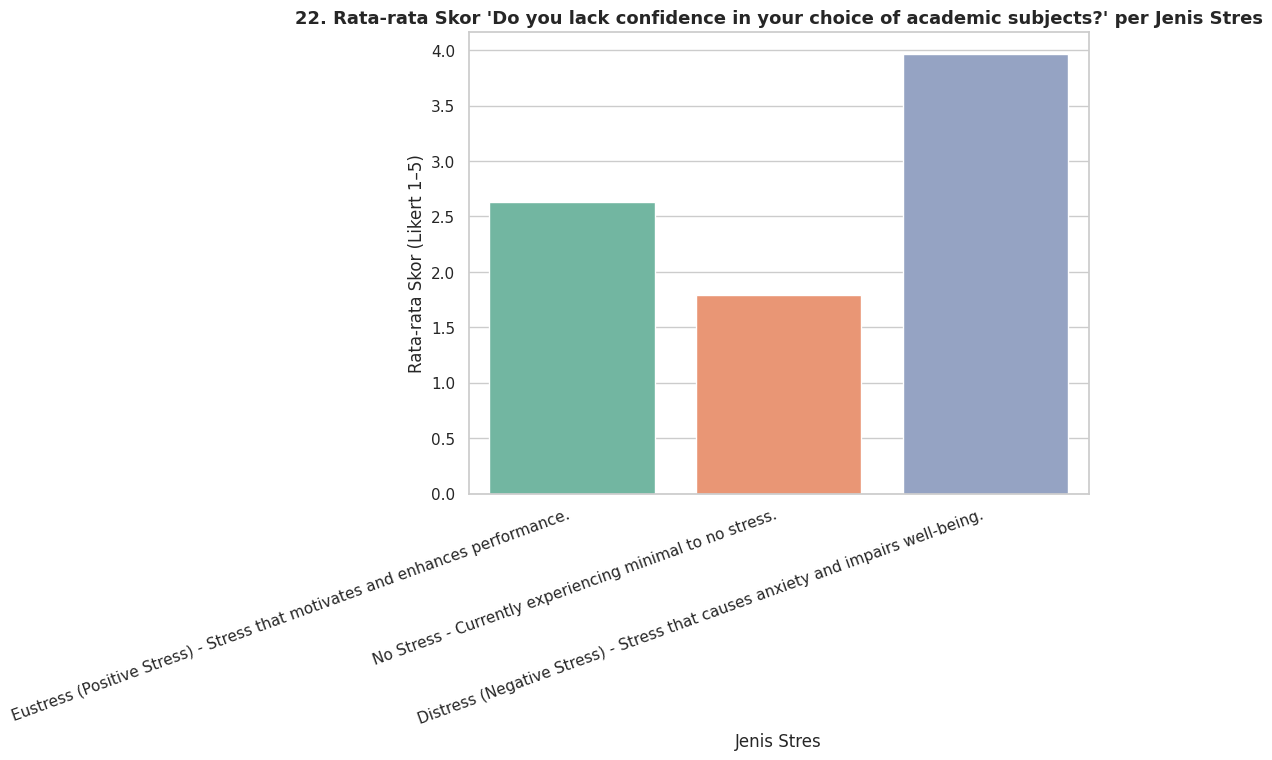

/tmp/ipython-input-848288932.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


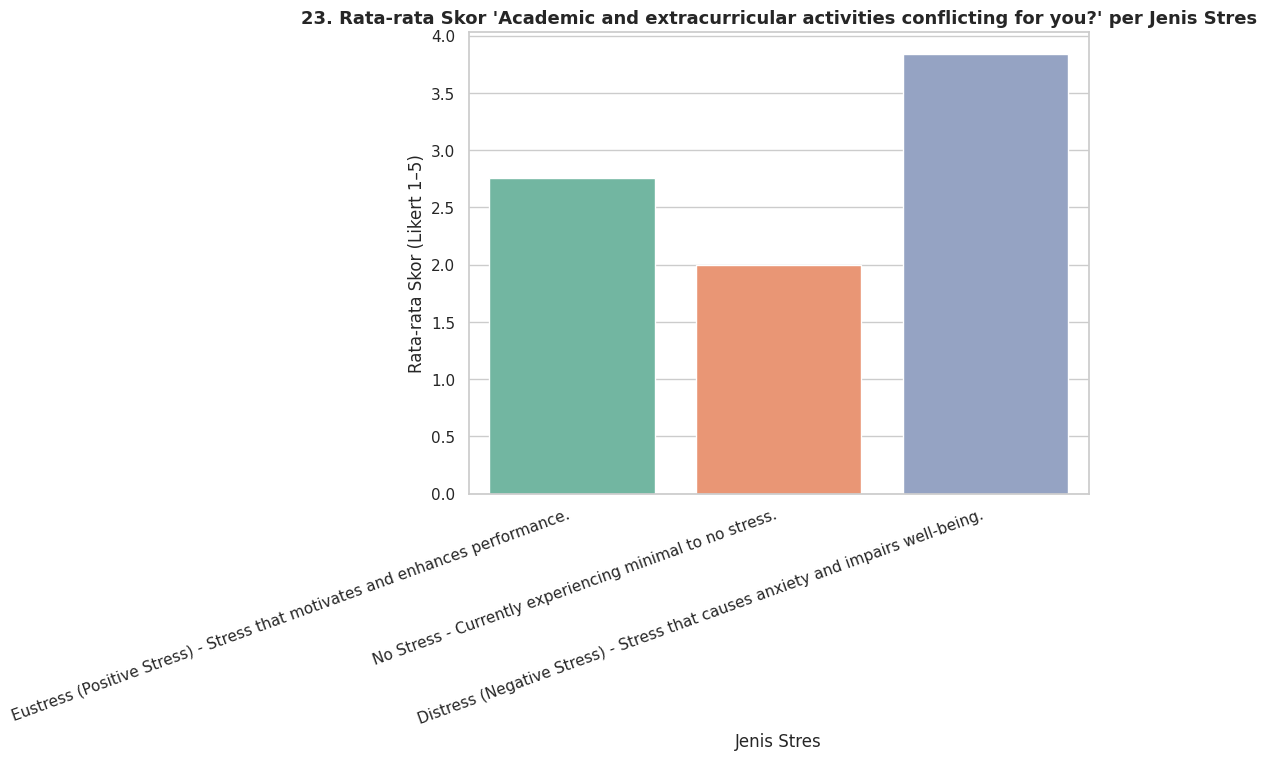

/tmp/ipython-input-848288932.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


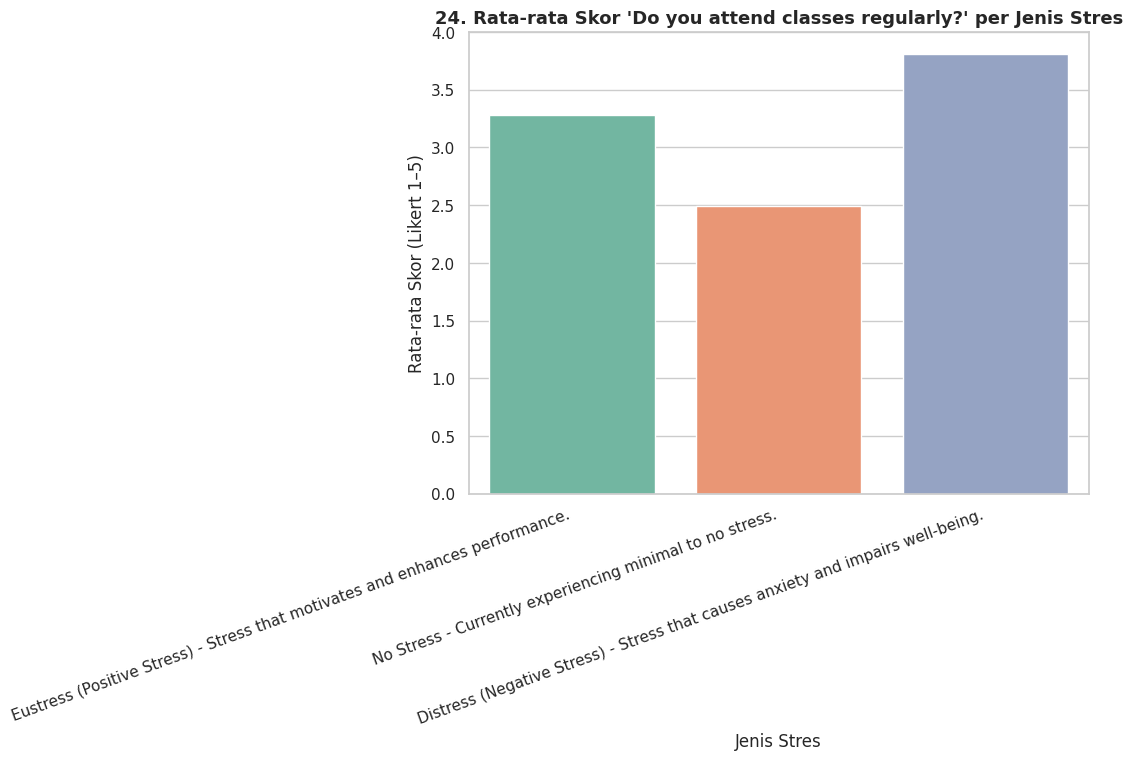

/tmp/ipython-input-848288932.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


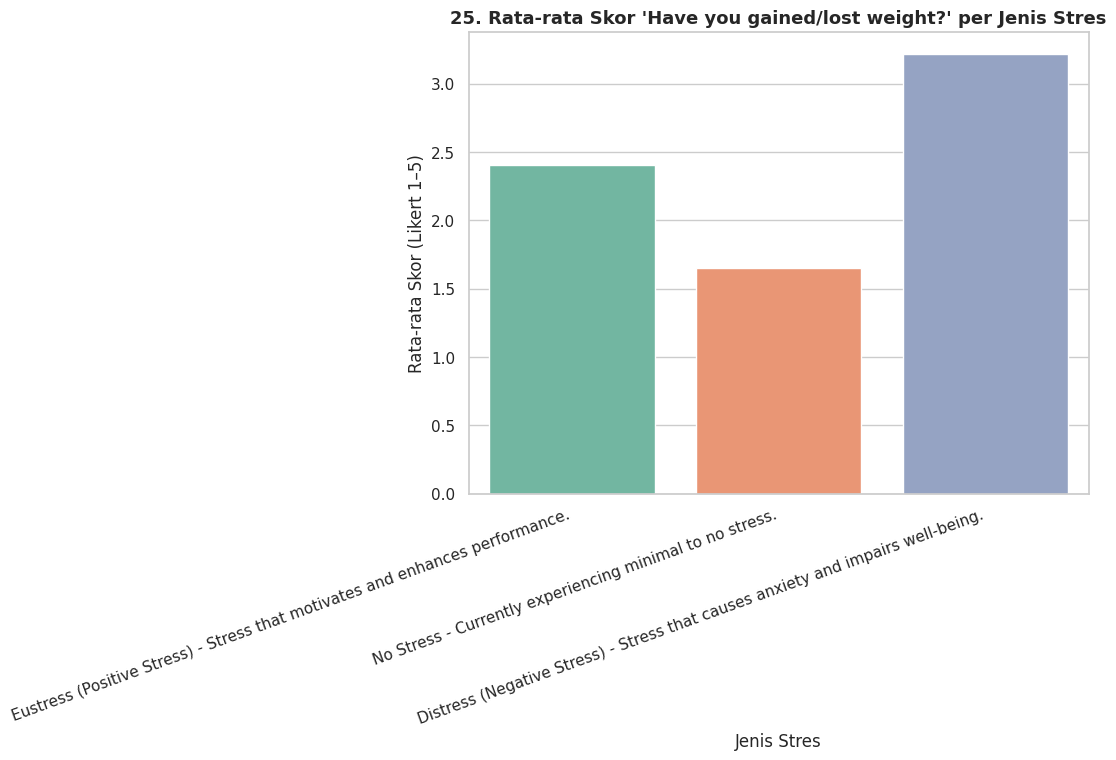

In [ ]:
# ==============================
# 9. Analisis Univariat (Semua Likert Otomatis)
# ==============================
likert_cols = numeric_df.columns

n_cols = 2
n_rows = (len(likert_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows*4))
axes = axes.flatten()

for i, col in enumerate(likert_cols):
    sns.histplot(df[col], bins=5, kde=False, ax=axes[i], color="skyblue", edgecolor="black")
    axes[i].set_title(f"{i+1}. Distribusi {col}", fontsize=11, fontweight="bold")
    axes[i].set_xlabel("Skor (1–5)")
    axes[i].set_ylabel("Frekuensi")
    axes[i].set_xticks([1,2,3,4,5])  # pastikan Likert scale terbaca jelas

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Distribusi Semua Pertanyaan Likert", fontsize=15, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# ==============================
# 10. Analisis Bivariat (Semua Likert vs Target)
# ==============================
for i, col in enumerate(likert_cols, 1):
    plt.figure(figsize=(8,6))
    sns.barplot(
        x=target_col,
        y=col,
        data=df,
        estimator="mean",
        errorbar=None,
        palette="Set2"
    )
    plt.title(f"{i}. Rata-rata Skor '{col}' per Jenis Stres", fontsize=13, fontweight="bold")
    plt.xlabel("Jenis Stres")
    plt.ylabel("Rata-rata Skor (Likert 1–5)")
    plt.xticks(rotation=20, ha="right")
    plt.show()

# **DATA PREPROCESSING**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# 1. Pisahkan features & target
X = df.drop(columns=["Which type of stress do you primarily experience?"])
y = df["Which type of stress do you primarily experience?"]

# 2. Encode target (eustress, distress, no stress → angka)
label_enc = LabelEncoder()
y_encoded = label_enc.fit_transform(y)

# 3. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# 4. Pipeline preprocessing
pipeline = Pipeline([
    ('scaler', StandardScaler()),      # scaling
    ('smote', SMOTE(random_state=42))  # handle imbalance
])

# Terapkan SMOTE hanya pada training set
X_train_res, y_train_res = pipeline.fit_resample(X_train, y_train)

print("Original dataset shape:", X_train.shape, "Target distribution:", pd.Series(y_train).value_counts().to_dict())
print("Resampled dataset shape:", X_train_res.shape, "Target distribution:", pd.Series(y_train_res).value_counts().to_dict())

Original dataset shape: (674, 25) Target distribution: {1: 614, 2: 34, 0: 26}
Resampled dataset shape: (1842, 25) Target distribution: {2: 614, 1: 614, 0: 614}


# **MODELiNG**

run pertama

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier

# 1. Load dataset (DATA1 = dataframe kamu)
X = df.drop(columns=["Which type of stress do you primarily experience?"])
y = df["Which type of stress do you primarily experience?"]

# 2. Encode target
label_enc = LabelEncoder()
y_encoded = label_enc.fit_transform(y)

# 3. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# 4. Model candidates
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# 5. Train & Evaluate each model with pipeline
results = {}

for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('model', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"\n=== {name} ===")
    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred, target_names=label_enc.classes_))

# 6. Advanced Models - Ensemble Voting
voting_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('voting', VotingClassifier(
        estimators=[
            ('rf', RandomForestClassifier(random_state=42)),
            ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)),
            ('gb', GradientBoostingClassifier(random_state=42))
        ],
        voting='soft'
    ))
])

voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)
print("\n=== Ensemble Voting ===")
print("Accuracy:", accuracy_score(y_test, y_pred_voting))
print(classification_report(y_test, y_pred_voting, target_names=label_enc.classes_))

# 7. Advanced Models - Stacking
stacking_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('stacking', StackingClassifier(
        estimators=[
            ('lr', LogisticRegression(max_iter=1000, random_state=42)),
            ('rf', RandomForestClassifier(random_state=42)),
            ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
        ],
        final_estimator=GradientBoostingClassifier(random_state=42),
        cv=5
    ))
])

stacking_clf.fit(X_train, y_train)
y_pred_stacking = stacking_clf.predict(X_test)
print("\n=== Ensemble Stacking ===")
print("Accuracy:", accuracy_score(y_test, y_pred_stacking))
print(classification_report(y_test, y_pred_stacking, target_names=label_enc.classes_))

# 8. Ringkasan hasil
print("\n📊 Summary Accuracy Scores:")
for model, acc in results.items():
    print(f"{model}: {acc:.4f}")
print(f"Ensemble Voting: {accuracy_score(y_test, y_pred_voting):.4f}")
print(f"Ensemble Stacking: {accuracy_score(y_test, y_pred_stacking):.4f}")



=== Logistic Regression ===
Accuracy: 0.9881656804733728
                                                                                 precision    recall  f1-score   support

Distress (Negative Stress) - Stress that causes anxiety and impairs well-being.       0.83      0.83      0.83         6
   Eustress (Positive Stress) - Stress that motivates and enhances performance.       0.99      0.99      0.99       154
                       No Stress - Currently experiencing minimal to no stress.       1.00      1.00      1.00         9

                                                                       accuracy                           0.99       169
                                                                      macro avg       0.94      0.94      0.94       169
                                                                   weighted avg       0.99      0.99      0.99       169


=== Naive Bayes ===
Accuracy: 0.9171597633136095
                                          

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [03:56:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== XGBoost ===
Accuracy: 0.9526627218934911
                                                                                 precision    recall  f1-score   support

Distress (Negative Stress) - Stress that causes anxiety and impairs well-being.       1.00      0.67      0.80         6
   Eustress (Positive Stress) - Stress that motivates and enhances performance.       0.95      1.00      0.97       154
                       No Stress - Currently experiencing minimal to no stress.       1.00      0.33      0.50         9

                                                                       accuracy                           0.95       169
                                                                      macro avg       0.98      0.67      0.76       169
                                                                   weighted avg       0.96      0.95      0.94       169


=== Gradient Boosting ===
Accuracy: 0.9467455621301775
                                                

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [03:56:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== Ensemble Voting ===
Accuracy: 0.9526627218934911
                                                                                 precision    recall  f1-score   support

Distress (Negative Stress) - Stress that causes anxiety and impairs well-being.       1.00      0.67      0.80         6
   Eustress (Positive Stress) - Stress that motivates and enhances performance.       0.95      1.00      0.97       154
                       No Stress - Currently experiencing minimal to no stress.       1.00      0.33      0.50         9

                                                                       accuracy                           0.95       169
                                                                      macro avg       0.98      0.67      0.76       169
                                                                   weighted avg       0.96      0.95      0.94       169



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [03:56:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [03:56:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== Ensemble Stacking ===
Accuracy: 0.9822485207100592
                                                                                 precision    recall  f1-score   support

Distress (Negative Stress) - Stress that causes anxiety and impairs well-being.       1.00      0.83      0.91         6
   Eustress (Positive Stress) - Stress that motivates and enhances performance.       0.98      1.00      0.99       154
                       No Stress - Currently experiencing minimal to no stress.       1.00      0.78      0.88         9

                                                                       accuracy                           0.98       169
                                                                      macro avg       0.99      0.87      0.92       169
                                                                   weighted avg       0.98      0.98      0.98       169


📊 Summary Accuracy Scores:
Logistic Regression: 0.9882
Naive Bayes: 0.9172
Decision Tree: 0.8

run kedua

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier

# 1. Load dataset (DATA1 = dataframe kamu)
X = df.drop(columns=["Which type of stress do you primarily experience?"])
y = df["Which type of stress do you primarily experience?"]

# 2. Encode target
label_enc = LabelEncoder()
y_encoded = label_enc.fit_transform(y)

# 3. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# 4. Model candidates
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# 5. Train & Evaluate each model with pipeline
results = {}

for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('model', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"\n=== {name} ===")
    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred, target_names=label_enc.classes_))

# 6. Advanced Models - Ensemble Voting
voting_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('voting', VotingClassifier(
        estimators=[
            ('rf', RandomForestClassifier(random_state=42)),
            ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)),
            ('gb', GradientBoostingClassifier(random_state=42))
        ],
        voting='soft'
    ))
])

voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)
print("\n=== Ensemble Voting ===")
print("Accuracy:", accuracy_score(y_test, y_pred_voting))
print(classification_report(y_test, y_pred_voting, target_names=label_enc.classes_))

# 7. Advanced Models - Stacking
stacking_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('stacking', StackingClassifier(
        estimators=[
            ('lr', LogisticRegression(max_iter=1000, random_state=42)),
            ('rf', RandomForestClassifier(random_state=42)),
            ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
        ],
        final_estimator=GradientBoostingClassifier(random_state=42),
        cv=5
    ))
])

stacking_clf.fit(X_train, y_train)
y_pred_stacking = stacking_clf.predict(X_test)
print("\n=== Ensemble Stacking ===")
print("Accuracy:", accuracy_score(y_test, y_pred_stacking))
print(classification_report(y_test, y_pred_stacking, target_names=label_enc.classes_))

# 8. Ringkasan hasil
print("\n📊 Summary Accuracy Scores:")
for model, acc in results.items():
    print(f"{model}: {acc:.4f}")
print(f"Ensemble Voting: {accuracy_score(y_test, y_pred_voting):.4f}")
print(f"Ensemble Stacking: {accuracy_score(y_test, y_pred_stacking):.4f}")


=== Logistic Regression ===
Accuracy: 0.9881656804733728
                                                                                 precision    recall  f1-score   support

Distress (Negative Stress) - Stress that causes anxiety and impairs well-being.       0.83      0.83      0.83         6
   Eustress (Positive Stress) - Stress that motivates and enhances performance.       0.99      0.99      0.99       154
                       No Stress - Currently experiencing minimal to no stress.       1.00      1.00      1.00         9

                                                                       accuracy                           0.99       169
                                                                      macro avg       0.94      0.94      0.94       169
                                                                   weighted avg       0.99      0.99      0.99       169


=== Naive Bayes ===
Accuracy: 0.9171597633136095
                                          

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [02:05:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== XGBoost ===
Accuracy: 0.9526627218934911
                                                                                 precision    recall  f1-score   support

Distress (Negative Stress) - Stress that causes anxiety and impairs well-being.       1.00      0.67      0.80         6
   Eustress (Positive Stress) - Stress that motivates and enhances performance.       0.95      1.00      0.97       154
                       No Stress - Currently experiencing minimal to no stress.       1.00      0.33      0.50         9

                                                                       accuracy                           0.95       169
                                                                      macro avg       0.98      0.67      0.76       169
                                                                   weighted avg       0.96      0.95      0.94       169


=== Gradient Boosting ===
Accuracy: 0.9467455621301775
                                                

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [02:05:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== Ensemble Voting ===
Accuracy: 0.9526627218934911
                                                                                 precision    recall  f1-score   support

Distress (Negative Stress) - Stress that causes anxiety and impairs well-being.       1.00      0.67      0.80         6
   Eustress (Positive Stress) - Stress that motivates and enhances performance.       0.95      1.00      0.97       154
                       No Stress - Currently experiencing minimal to no stress.       1.00      0.33      0.50         9

                                                                       accuracy                           0.95       169
                                                                      macro avg       0.98      0.67      0.76       169
                                                                   weighted avg       0.96      0.95      0.94       169



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [02:05:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [02:05:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== Ensemble Stacking ===
Accuracy: 0.9822485207100592
                                                                                 precision    recall  f1-score   support

Distress (Negative Stress) - Stress that causes anxiety and impairs well-being.       1.00      0.83      0.91         6
   Eustress (Positive Stress) - Stress that motivates and enhances performance.       0.98      1.00      0.99       154
                       No Stress - Currently experiencing minimal to no stress.       1.00      0.78      0.88         9

                                                                       accuracy                           0.98       169
                                                                      macro avg       0.99      0.87      0.92       169
                                                                   weighted avg       0.98      0.98      0.98       169


📊 Summary Accuracy Scores:
Logistic Regression: 0.9882
Naive Bayes: 0.9172
Decision Tree: 0.8

Perbandingan Akurasi (Bar Chart)

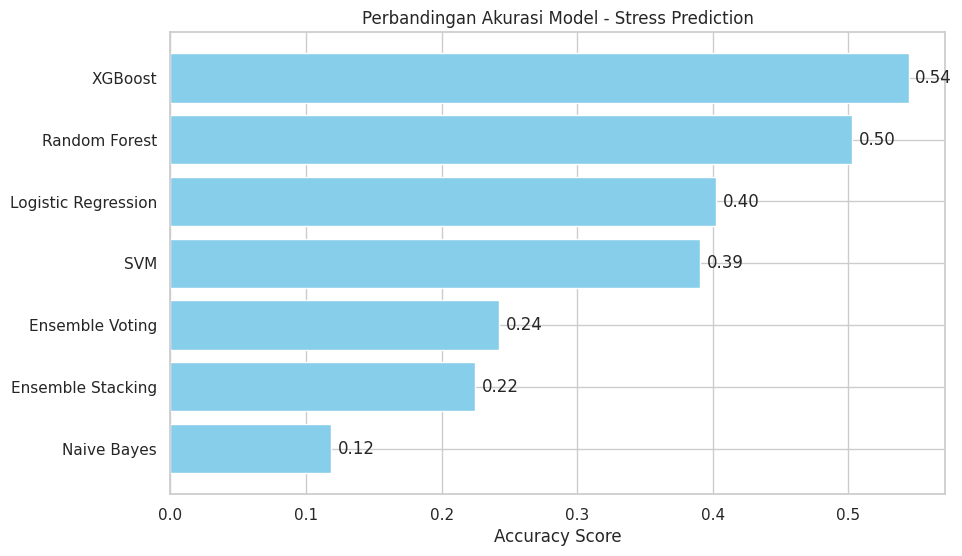

In [ ]:
import matplotlib.pyplot as plt

# Ringkasan hasil akurasi (sudah ada dari loop sebelumnya)
all_results = results.copy()
all_results["Ensemble Voting"] = accuracy_score(y_test, y_pred_voting)
all_results["Ensemble Stacking"] = accuracy_score(y_test, y_pred_stacking)

# Urutkan dari akurasi tertinggi ke terendah
sorted_results = dict(sorted(all_results.items(), key=lambda x: x[1], reverse=True))

# Plot bar chart
plt.figure(figsize=(10,6))
plt.barh(list(sorted_results.keys()), list(sorted_results.values()), color="skyblue")
plt.xlabel("Accuracy Score")
plt.title("Perbandingan Akurasi Model - Stress Prediction")
plt.gca().invert_yaxis()  # biar model terbaik ada di atas
for i, v in enumerate(sorted_results.values()):
    plt.text(v + 0.005, i, f"{v:.2f}", va="center")
plt.show()


F1-Score per Kelas (Grouped Bar Chart)

=== Logistic Regression ===
                                                                                 precision    recall  f1-score   support

Distress (Negative Stress) - Stress that causes anxiety and impairs well-being.       0.28      0.83      0.42         6
   Eustress (Positive Stress) - Stress that motivates and enhances performance.       0.99      0.92      0.95       154
                       No Stress - Currently experiencing minimal to no stress.       1.00      1.00      1.00         9

                                                                       accuracy                           0.92       169
                                                                      macro avg       0.76      0.92      0.79       169
                                                                   weighted avg       0.97      0.92      0.94       169

=== Random Forest ===
                                                                                 precision    recall

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [02:10:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== XGBoost ===
                                                                                 precision    recall  f1-score   support

Distress (Negative Stress) - Stress that causes anxiety and impairs well-being.       0.62      0.83      0.71         6
   Eustress (Positive Stress) - Stress that motivates and enhances performance.       0.96      0.98      0.97       154
                       No Stress - Currently experiencing minimal to no stress.       1.00      0.33      0.50         9

                                                                       accuracy                           0.94       169
                                                                      macro avg       0.86      0.72      0.73       169
                                                                   weighted avg       0.95      0.94      0.93       169

=== Gradient Boosting ===
                                                                                 precision    recall  f1-sco

<Figure size 1200x600 with 0 Axes>

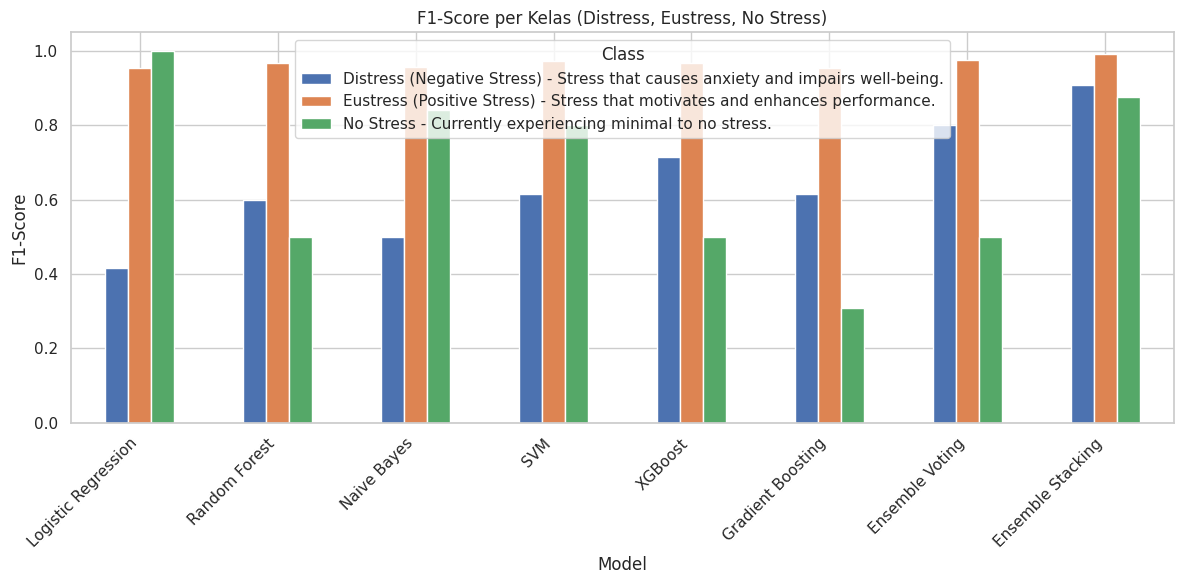

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, f1_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier, StackingClassifier


# Ambil nama kelas dari label encoder
class_labels = label_enc.classes_

# Dictionary untuk simpan f1-score tiap model
f1_scores = {}

# Tentukan preprocessing pipeline (tanpa SMOTE)
num_features = X_train.select_dtypes(include=["int64", "float64"]).columns
# Assuming no categorical features in this dataset based on previous EDA output,
# if there were, you would include 'object' here and handle appropriately.
# cat_features = X_train.select_dtypes(include=["object"]).columns


preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_features),
    # ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features) # Uncomment if there are categorical features
])

# Definisikan SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data before fitting the pipeline
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


# Hitung F1-score untuk semua model
models_to_evaluate = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42), # Increased max_iter
    "Random Forest": RandomForestClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(random_state=42), # Removed kernel="linear" for potentially better performance with non-linear data
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42) # Added Gradient Boosting back
}

for name, model in models_to_evaluate.items():
    pipe = Pipeline([
        ("preprocess", preprocessor),
        ("classifier", model)
    ])
    # Fit the pipeline on the resampled training data
    pipe.fit(X_train_res, y_train_res)
    y_pred = pipe.predict(X_test)

    report = classification_report(y_test, y_pred, target_names=class_labels, output_dict=True)
    f1_scores[name] = [report[label]['f1-score'] for label in class_labels]
    print(f"=== {name} ===")
    print(classification_report(y_test, y_pred, target_names=class_labels))


# Include Ensemble Voting and Stacking if they were run successfully before
# Assuming y_pred_voting and y_pred_stacking are available

if 'y_pred_voting' in locals():
    report_voting = classification_report(y_test, y_pred_voting, target_names=class_labels, output_dict=True)
    f1_scores["Ensemble Voting"] = [report_voting[label]['f1-score'] for label in class_labels]
    print("\n=== Ensemble Voting ===")
    print(classification_report(y_test, y_pred_voting, target_names=class_labels))


if 'y_pred_stacking' in locals():
    report_stacking = classification_report(y_test, y_pred_stacking, target_names=class_labels, output_dict=True)
    f1_scores["Ensemble Stacking"] = [report_stacking[label]['f1-score'] for label in class_labels]
    print("\n=== Ensemble Stacking ===")
    print(classification_report(y_test, y_pred_stacking, target_names=class_labels))


# Buat DataFrame untuk plotting
f1_df = pd.DataFrame(f1_scores, index=class_labels).T  # transpose biar model jadi index
f1_df = f1_df.reset_index().rename(columns={"index": "Model"})

# Plot grouped bar chart
plt.figure(figsize=(12,6))
f1_df.plot(x="Model", kind="bar", figsize=(12,6))
plt.title("F1-Score per Kelas (Distress, Eustress, No Stress)")
plt.ylabel("F1-Score")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Class")
plt.tight_layout()
plt.show()

**feature importance dari Random Forest & XGBoost**

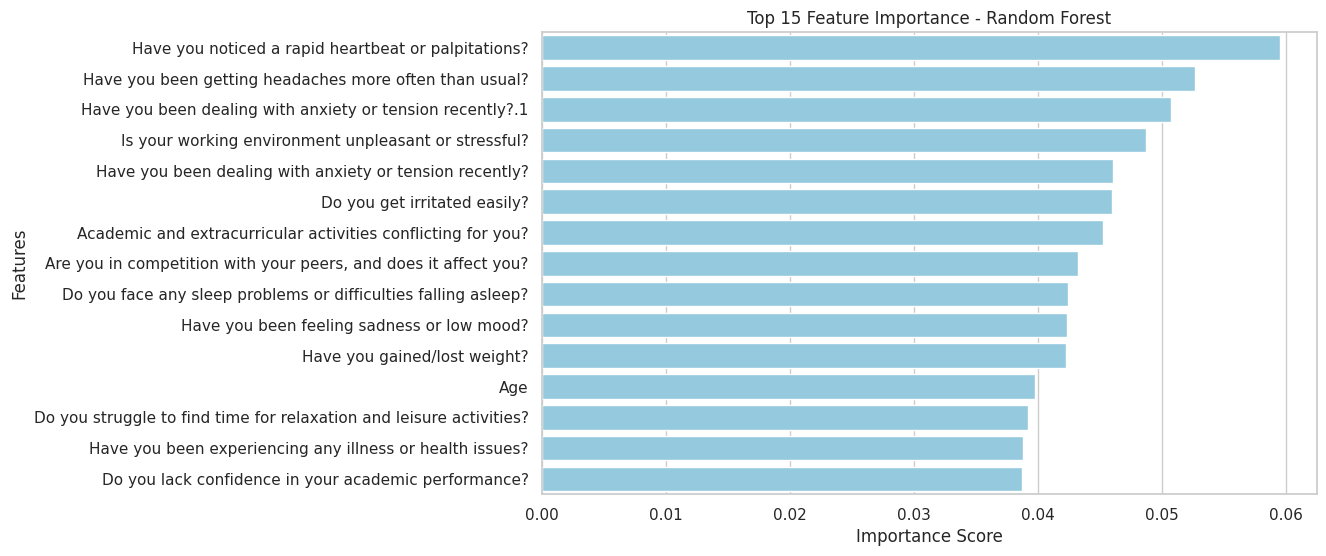

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [02:11:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


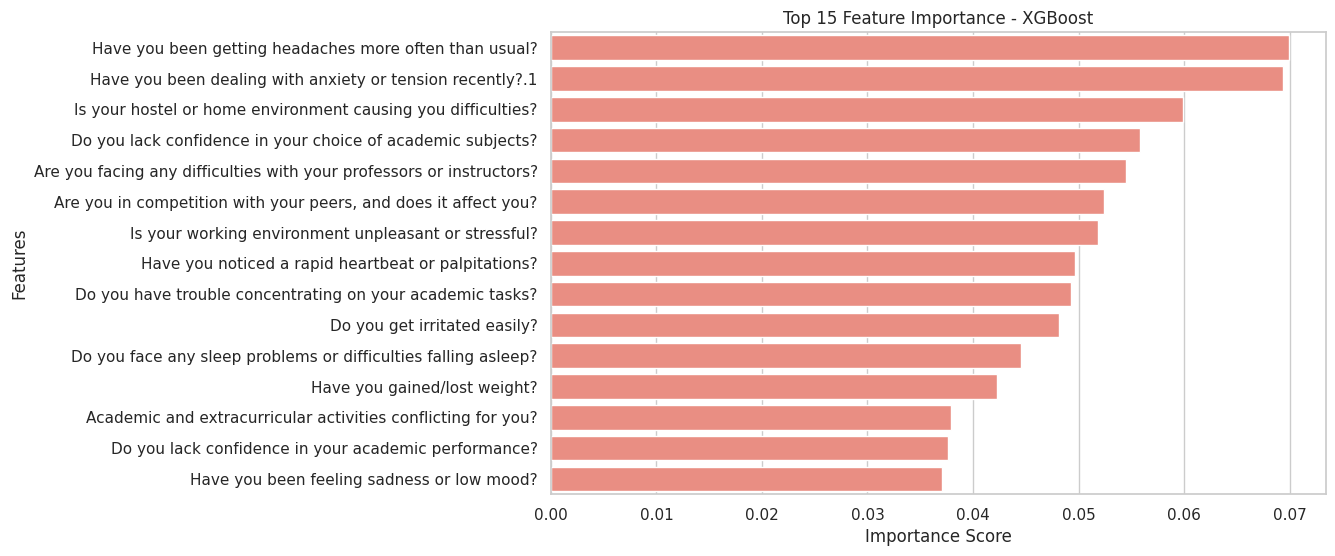

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# === 1. Load dataset ===

# Tentukan target & fitur
target = "Which type of stress do you primarily experience?"
X = df.drop(columns=[target])
y = df[target]

# Encoding target
le = LabelEncoder()
y = le.fit_transform(y)

# Jika ada fitur kategorikal -> encoding
X = pd.get_dummies(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === 2. Random Forest Feature Importance ===
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

rf_importances = pd.Series(rf.feature_importances_, index=X.columns)
rf_importances = rf_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=rf_importances.values[:15], y=rf_importances.index[:15], color="skyblue")
plt.title("Top 15 Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# === 3. XGBoost Feature Importance ===
xgb = XGBClassifier(n_estimators=200, random_state=42, use_label_encoder=False, eval_metric="mlogloss")
xgb.fit(X_train, y_train)

xgb_importances = pd.Series(xgb.feature_importances_, index=X.columns)
xgb_importances = xgb_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=xgb_importances.values[:15], y=xgb_importances.index[:15], color="salmon")
plt.title("Top 15 Feature Importance - XGBoost")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()
